In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from matplotlib.ticker import MaxNLocator

In [3]:
n_hidden = 100
n_stimulations = 1000
rnn_ev_before = np.zeros(n_hidden*n_stimulations, dtype="complex_")

for i in range(n_stimulations):
    W = np.random.uniform(low=-1/np.sqrt(n_hidden), high=1/np.sqrt(n_hidden), size=(n_hidden, n_hidden))
    eigen = np.linalg.eigvals(W)
    rnn_ev_before[n_hidden*i:n_hidden*(i+1)] = eigen

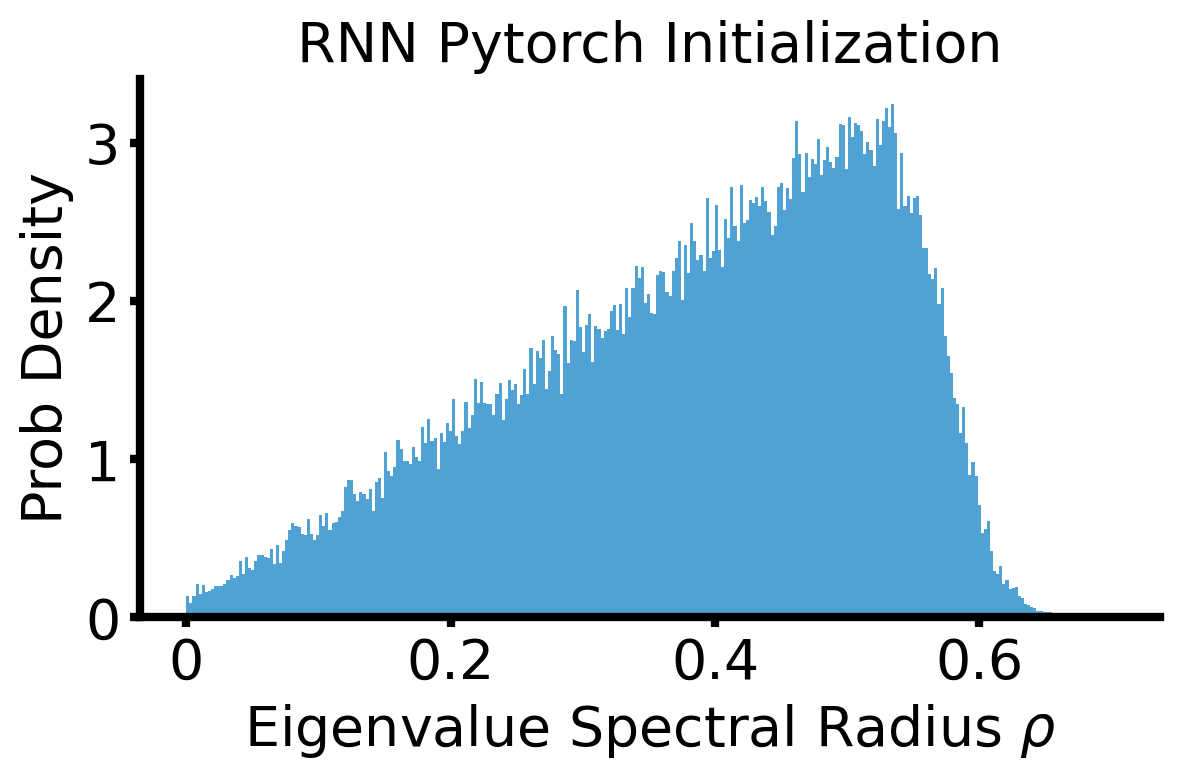

In [16]:
ax = plt.subplot(111)
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams["figure.figsize"] = (6,4)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)

ax.hist(np.sqrt(np.square(np.real(rnn_ev_before)) + np.square(np.imag(rnn_ev_before))), bins=300, density=True, edgecolor='none', color='#50a2d5')
ax.set_title('RNN Pytorch Initialization', fontsize=20)
ax.set_xlabel(r"Eigenvalue Spectral Radius $\rho$", fontsize=20)
ax.set_ylabel("Prob Density", fontsize=20)
plt.yticks(ticks=[0, 1, 2, 3], size=20)
plt.xticks(labels=["0", "0.2", "0.4", "0.6"], ticks=[0, 0.2, 0.4, 0.6], size=20)
plt.tight_layout()
# plt.savefig('new_plots/Dist_Eigen_Rad_RNN.svg', format='svg', dpi=200)
# plt.savefig('new_plots/Dist_Eigen_Rad_RNN.png', format='png', dpi=200)
plt.show()

In [17]:
n_stimulations = 500
n_excitation=90
n_inhibition=10
song_eigen_before = np.zeros(n_stimulations*(n_excitation+n_inhibition), dtype = 'complex_')
denom = ((2 * np.pi - 1) / (2 * np.pi)) * (n_excitation + (n_excitation ** 2 / n_inhibition))
# denom = (n_excitation + n_inhibition)

rho = 1.5

sigma_we = np.sqrt(1/denom)
sigma_wi = (n_excitation/n_inhibition) * sigma_we
# sigma_wi = sigma_we
largest = np.zeros(n_stimulations)
for i in range(n_stimulations):
    song_matr_pos = np.random.exponential(scale=sigma_we, size=(n_excitation+n_inhibition, n_excitation))
    song_matr_neg = -np.random.exponential(scale=sigma_wi, size=(n_excitation+n_inhibition, n_inhibition))
    song_matr = np.concatenate((song_matr_pos, song_matr_neg), axis=1)
    # np.fill_diagonal(song_matr, 0) This won't affect the results
    eigen = np.linalg.eigvals(song_matr)
    largest[i]=np.max( np.sqrt(np.power(np.real(eigen), 2) + np.power(np.imag(eigen), 2)) )
    # print(np.real(eigen))
    song_matr = song_matr*rho/largest[i]
    eigen = np.linalg.eigvals(song_matr)
    song_eigen_before[(n_excitation+n_inhibition)*i:(n_excitation+n_inhibition)*(i+1)] = eigen

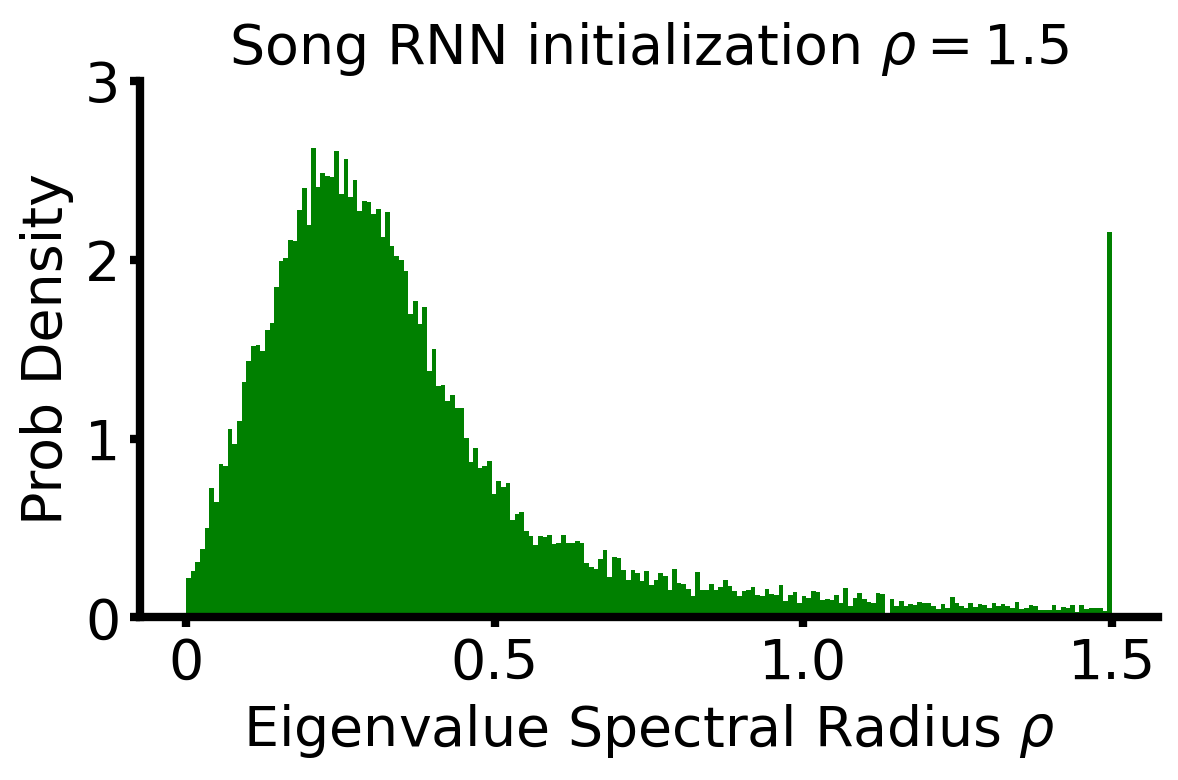

In [24]:
ax = plt.subplot(111)
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams["figure.figsize"] = (6,4)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)

ax.hist(np.sqrt(np.square(np.real(song_eigen_before)) + np.square(np.imag(song_eigen_before))), bins=200, density=True, edgecolor='none', color='g')
plt.yticks(ticks=[0, 1, 2, 3], size=20)
plt.xticks(labels=["0", "0.5", "1.0", "1.5"], ticks=[0, 0.5, 1.0, 1.5], size=20)
ax.set_title(r'Song RNN initialization $\rho=1.5$', fontsize=20)
ax.set_xlabel(r"Eigenvalue Spectral Radius $\rho$", fontsize=20)
ax.set_ylabel(r"Prob Density", fontsize=20)
plt.tight_layout()
# plt.savefig('new_plots/Dist_Eigen_Rad_Song_rescale.svg', format='svg')
# plt.savefig('new_plots/Dist_Eigen_Rad_Song_rescale.png', format='png')

plt.show()

In [6]:
n_hidden = 100
n_stimulations = 10
rnn_ev_before = np.zeros(n_hidden*n_stimulations, dtype="complex_")

# sigma_wi = sigma_we
for i in range(n_stimulations):
    W = np.random.uniform(low=-1/np.sqrt(n_hidden), high=1/np.sqrt(n_hidden), size=(n_hidden, n_hidden))
    eigen = np.linalg.eigvals(W)
    rnn_ev_before[n_hidden*i:n_hidden*(i+1)] = eigen

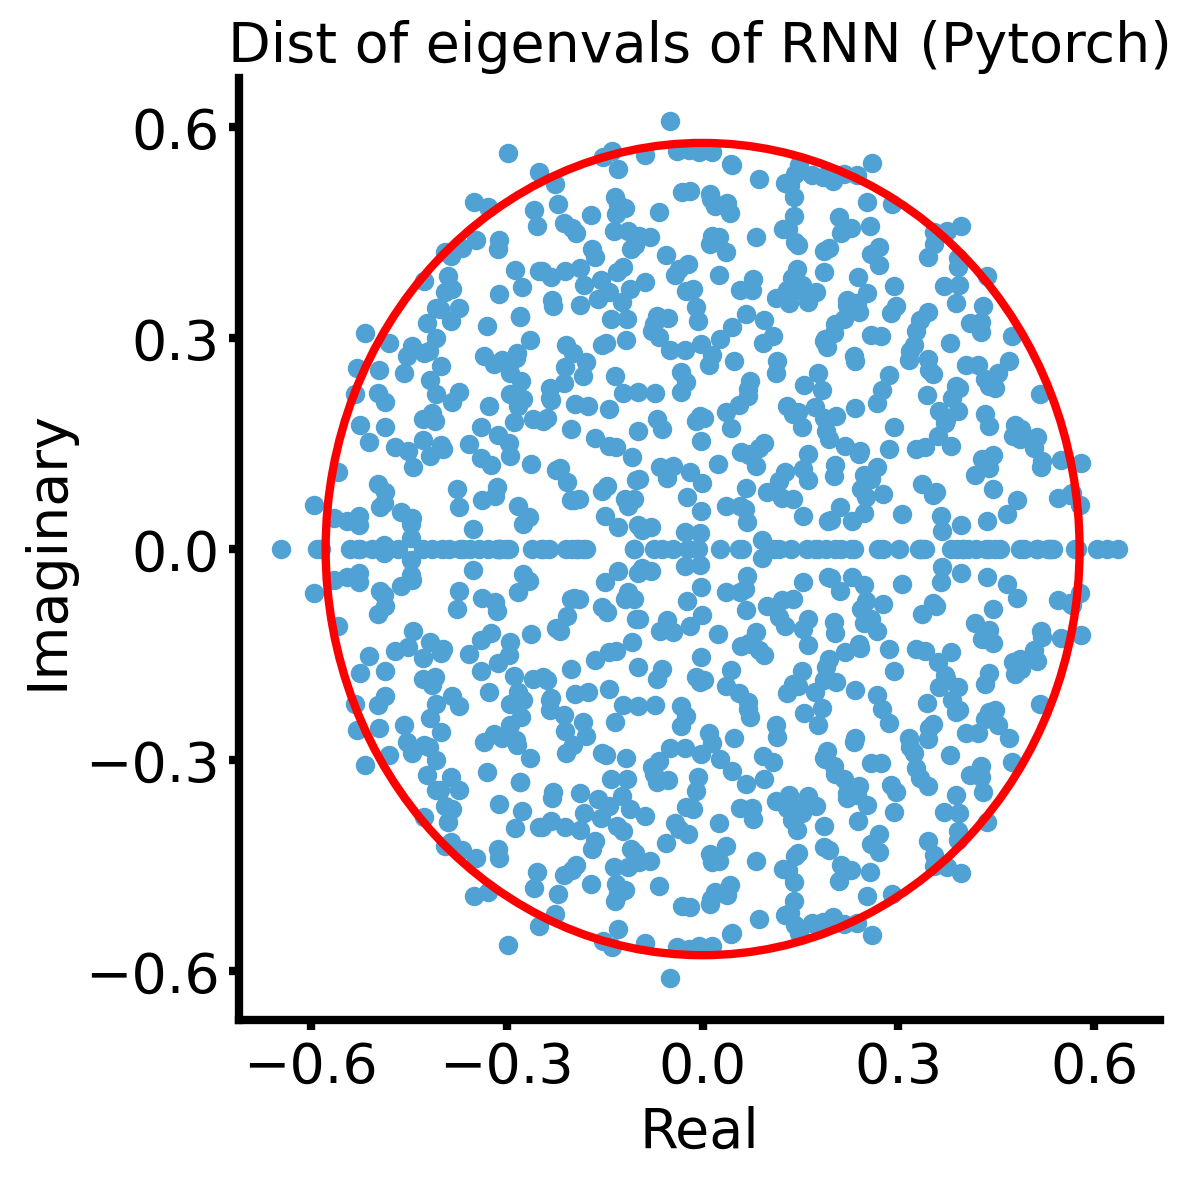

In [29]:
c = plt.Circle((0., 0.), 1./np.sqrt(3), color='r', fill=False, linewidth=3)

ax = plt.subplot(111)
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams["figure.figsize"] = (6,6)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
ax.scatter(np.real(rnn_ev_before), np.imag(rnn_ev_before), marker='o', color='#50a2d5')
ax.add_patch(c)
plt.yticks(ticks=[-0.6, -0.3, 0.0, 0.3, 0.6], size=20)
plt.xticks(ticks=[-0.6, -0.3, 0.0, 0.3, 0.6], size=20)
ax.set_ylabel('Imaginary', fontsize=20)
ax.set_xlabel('Real', fontsize=20)
ax.set_title('Dist of eigenvals of RNN (Pytorch)', fontsize=20)
plt.tight_layout()
plt.savefig('new_plots/Dist_Eigen_Plane_RNN.svg', format='svg', dpi=200)
plt.savefig('new_plots/Dist_Eigen_Plane_RNN.png', format='png', dpi=200)

plt.show()

In [6]:
n_stimulations = 1000
n_hidden = 100
rnn_sv_before = np.zeros((n_hidden*n_stimulations))
num=1
sigma_we = np.sqrt(1/denom)
sigma_wi = (n_excitation/n_inhibition) * sigma_we
# sigma_wi = sigma_we
for i in range(n_stimulations):
    W = np.random.uniform(low=-num/np.sqrt(n_hidden), high=num/np.sqrt(n_hidden), size=(n_hidden, n_hidden))
    _, rnn_sigma, _ = np.linalg.svd(W)
    rnn_sv_before[n_hidden*i:n_hidden*(i+1)] = rnn_sigma

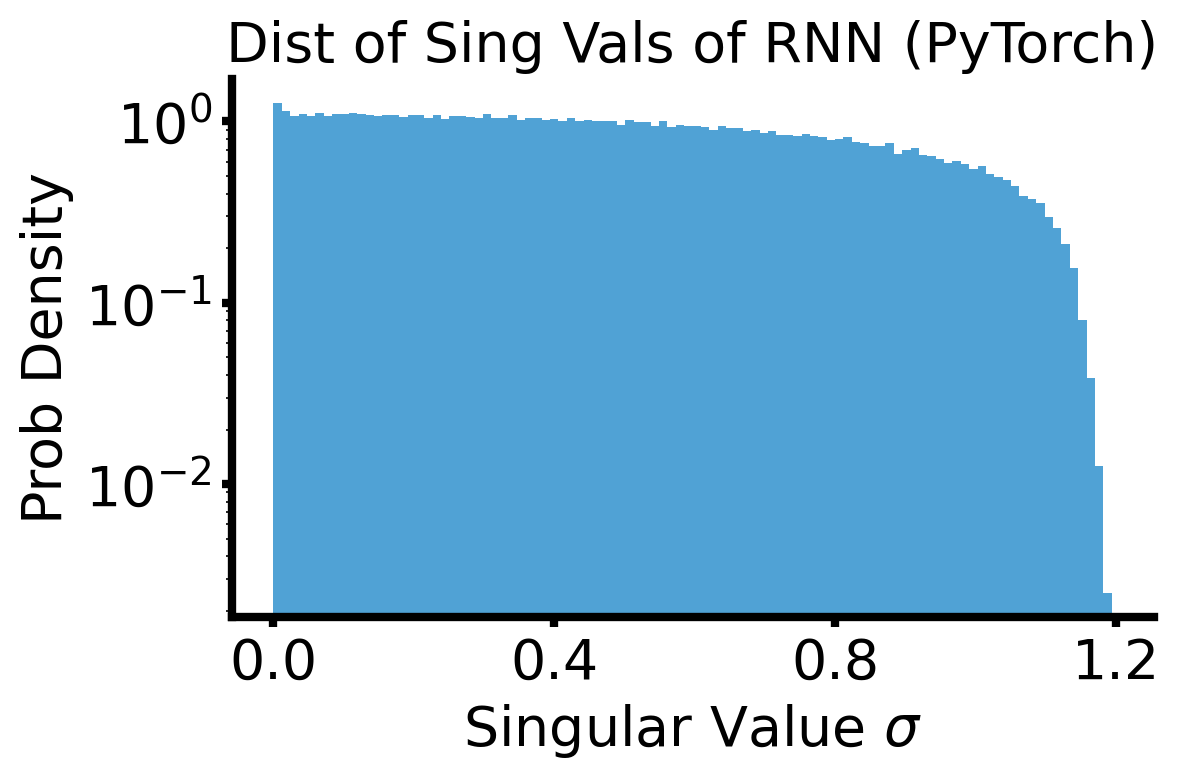

In [7]:
ax = plt.subplot(111)
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams["figure.figsize"] = (6,4)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)

plt.yscale('log')
plt.hist(rnn_sv_before, bins=100, density=True, edgecolor='none', color='#50a2d5')
# plt.yticks(ticks=[0, 0.6, 1.2], size=20)
plt.xticks(ticks=[0, 0.4, 0.8, 1.2], size=20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.title(r"Dist of Sing Vals of RNN (PyTorch)", fontsize=20)
plt.xlabel(r'Singular Value $\sigma$', fontsize=20)
plt.ylabel('Prob Density', fontsize=20)
plt.tight_layout()
# plt.savefig('new_plots/SV_RNN.svg', format='svg', dpi=200)
# plt.savefig('new_plots/SV_RNN.png', format='png', dpi=200)

plt.savefig('new_plots/SV_RNN_log.svg', format='svg', dpi=200)
plt.savefig('new_plots/SV_RNN_log.png', format='png', dpi=200)
plt.show()

In [23]:
n_stimulations = 100
n_excitation=90
n_inhibition=10
song_eigen_before = np.zeros(n_stimulations*(n_excitation+n_inhibition), dtype = 'complex_')
denom = ((2 * np.pi - 1) / (2 * np.pi)) * (n_excitation + (n_excitation ** 2 / n_inhibition))

rho = 1.5

sigma_we = np.sqrt(1/denom)
sigma_wi = (n_excitation/n_inhibition) * sigma_we
# sigma_wi = sigma_we
largest = np.zeros(n_stimulations)
for i in range(n_stimulations):
    song_matr_pos = np.random.exponential(scale=sigma_we, size=(n_excitation+n_inhibition, n_excitation))
    song_matr_neg = -np.random.exponential(scale=sigma_wi, size=(n_excitation+n_inhibition, n_inhibition))
    song_matr = np.concatenate((song_matr_pos, song_matr_neg), axis=1)
    # np.fill_diagonal(song_matr, 0) This won't affect the results much
    eigen = np.linalg.eigvals(song_matr)
    largest[i]=np.max( np.sqrt(np.power(np.real(eigen), 2) + np.power(np.imag(eigen), 2)) )
    song_matr = song_matr*rho/largest[i]
    eigen = np.linalg.eigvals(song_matr)
    song_eigen_before[(n_excitation+n_inhibition)*i:(n_excitation+n_inhibition)*(i+1)] = eigen

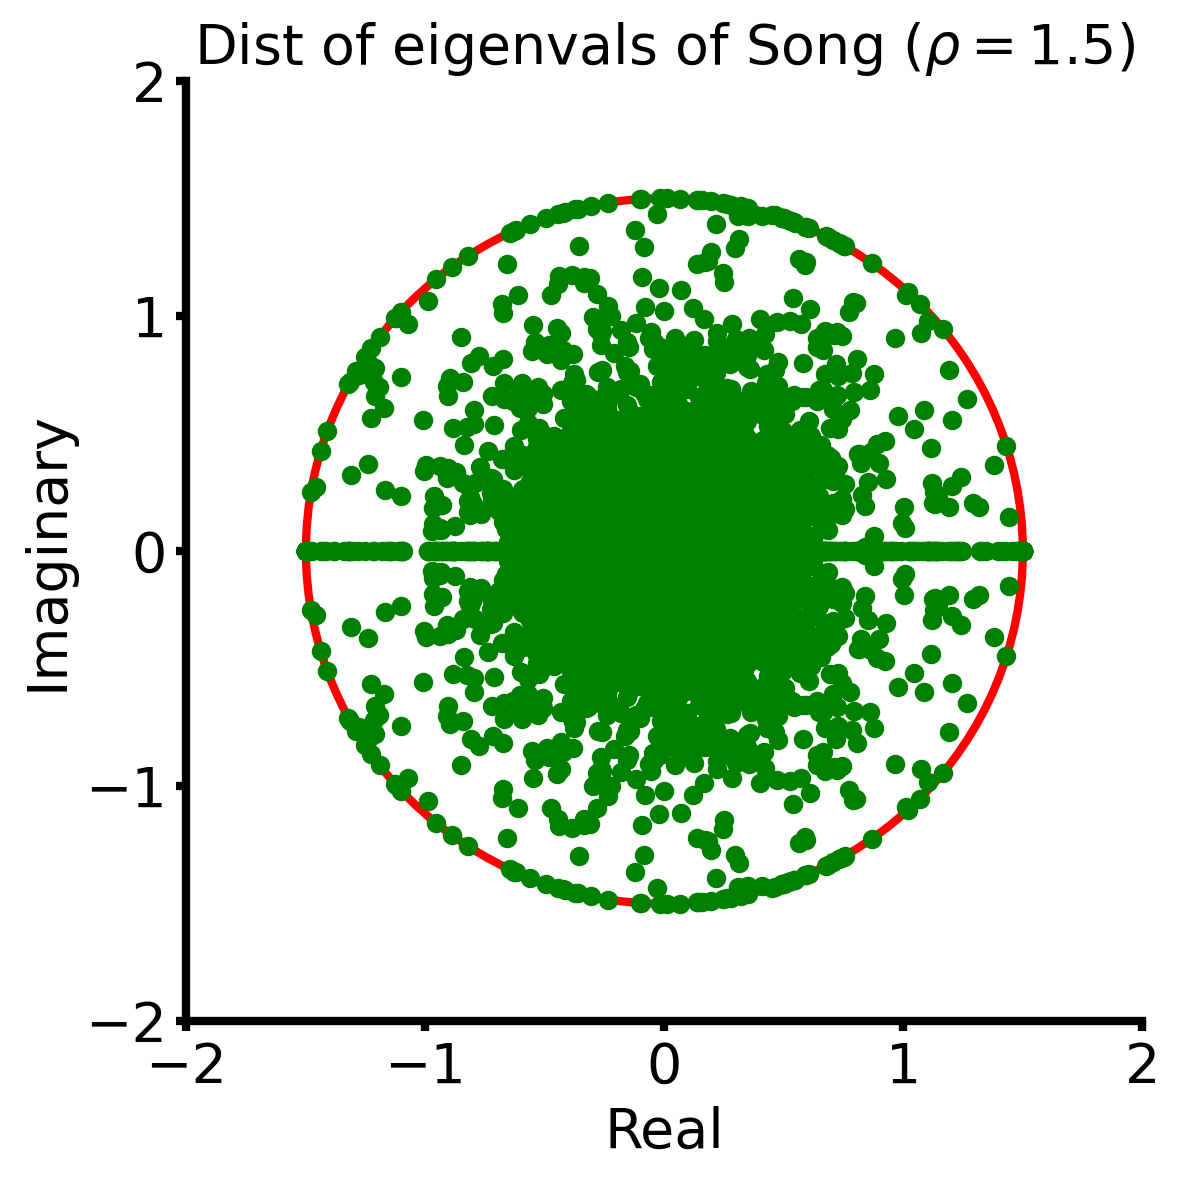

In [30]:
c = plt.Circle((0., 0.), 1.5, color='r', fill=False, linewidth=3)

ax = plt.subplot(111)
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams["figure.figsize"] = (6,6)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
ax.add_patch(c)
ax.scatter(np.real(song_eigen_before), np.imag(song_eigen_before), marker='o', color='green')
plt.yticks(ticks=[-2, -1, 0, 1, 2], size=20)
plt.xticks(ticks=[-2, -1, 0, 1, 2], size=20)
ax.set_ylabel('Imaginary', fontsize=20)
ax.set_xlabel('Real', fontsize=20)
ax.set_title(r'Dist of eigenvals of Song ($\rho=1.5$)', fontsize=20)
plt.tight_layout()
# plt.savefig('new_plots/Dist_Eigen_Plane_Song_rescaled.svg', format='svg', dpi=200)
# plt.savefig('new_plots/Dist_Eigen_Plane_Song_rescaled.png', format='png', dpi=200)
plt.show()

In [2]:
n_stimulations = 1000
n_excitation=90*1
n_inhibition=10*1
song_sv_before = np.zeros(n_stimulations*(n_excitation+n_inhibition))
largest = np.zeros(n_stimulations)
denom = ((2 * np.pi - 1) / (2 * np.pi)) * (n_excitation + (n_excitation ** 2 / n_inhibition))
rho=1.5
sigma_we = np.sqrt(1/denom)
sigma_wi = (n_excitation/n_inhibition) * sigma_we

for i in range(n_stimulations):
    song_matr_pos = np.random.exponential(scale=sigma_we, size=(n_excitation+n_inhibition, n_excitation))
    song_matr_neg = -np.random.exponential(scale=sigma_wi, size=(n_excitation+n_inhibition, n_inhibition))
    song_matr = np.concatenate((song_matr_pos, song_matr_neg), axis=1)
    # np.fill_diagonal(song_matr, 0) # This won't affect the result much
    
    eigen = np.linalg.eigvals(song_matr)
    largest[i]=np.max( np.sqrt(np.power(np.real(eigen), 2) + np.power(np.imag(eigen), 2)) )
    song_matr = song_matr*rho/largest[i]

    _, song_sigma, _ = np.linalg.svd(song_matr)
    largest[i] = np.max(song_sigma)
    song_sv_before[(n_excitation+n_inhibition)*i:(n_excitation+n_inhibition)*(i+1)] = song_sigma

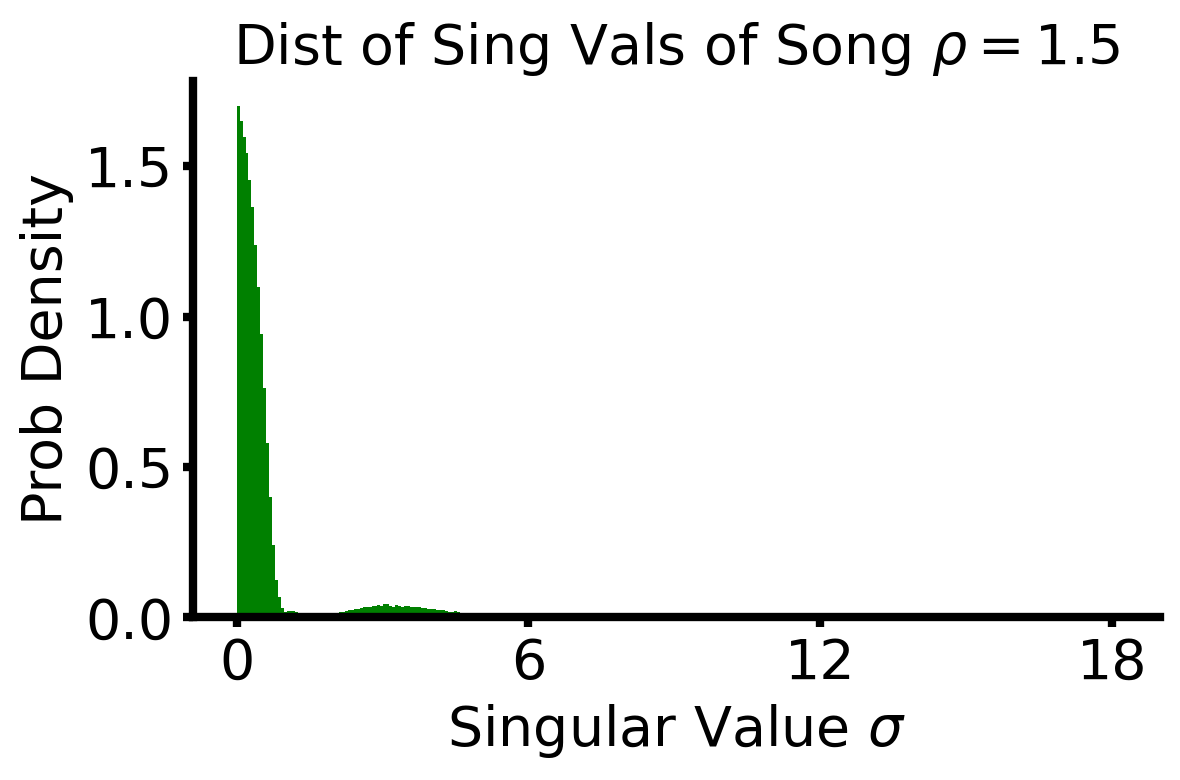

In [5]:
ax = plt.subplot(111)
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams["figure.figsize"] = (6,4)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)

# plt.yscale('log')
ax.hist(song_sv_before, bins=300, density=True, edgecolor='none', color='g')
ax.set_xlabel(r"Singular Value $\sigma$", fontsize=20)
ax.set_ylabel("Prob Density", fontsize=20)
# ax.set_ylim([0, 1.7])
plt.title(r"Dist of Sing Vals of Song $\rho=1.5$", fontsize=20)
# plt.yticks(ticks=[0, 0.8, 1.6], size=20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(ticks=[0, 6, 12, 18], size=20)
plt.tight_layout()
plt.savefig('new_plots/SV_Song_rescale.svg', format='svg', dpi=200)
plt.savefig('new_plots/SV_Song_rescale.png', format='png', dpi=200)

# plt.savefig('new_plots/SV_Song_rescale_log.svg', format='svg', dpi=200)
# plt.savefig('new_plots/SV_Song_rescale_log.png', format='png', dpi=200)

plt.show()

In [147]:
ne=100
ni=ne//10
num=1/3  # 1/3 for pytorch
n_stimulations = 10000
danns_eig= np.zeros(ne*n_stimulations, dtype = 'complex_')
danns_sv_before = np.zeros(ne*n_stimulations)
for i in range(n_stimulations):
    Wex = np.random.exponential(size=(ne, ne), scale=np.sqrt( (ne/((ne-1)) * ((num))/ne))) 
    Wix = (np.ones((ni, 1))) @ np.mean(Wex, axis=0, keepdims=True)
    Wei = np.random.exponential(size=(ne, ni), scale=np.sqrt( (ne/((ne-1)) * ((num))/ne)))
    Wei /= Wei.sum(axis=1, keepdims=True)
    danns_matrix = Wex - (Wei @ Wix)
    
    eigen = np.linalg.eigvals(danns_matrix)
    danns_eig[ne*i:ne*(i+1)] = eigen
    
    _, danns_sigma, _ = np.linalg.svd(danns_matrix)
    danns_sv_before[ne*i:ne*(i+1)] = danns_sigma

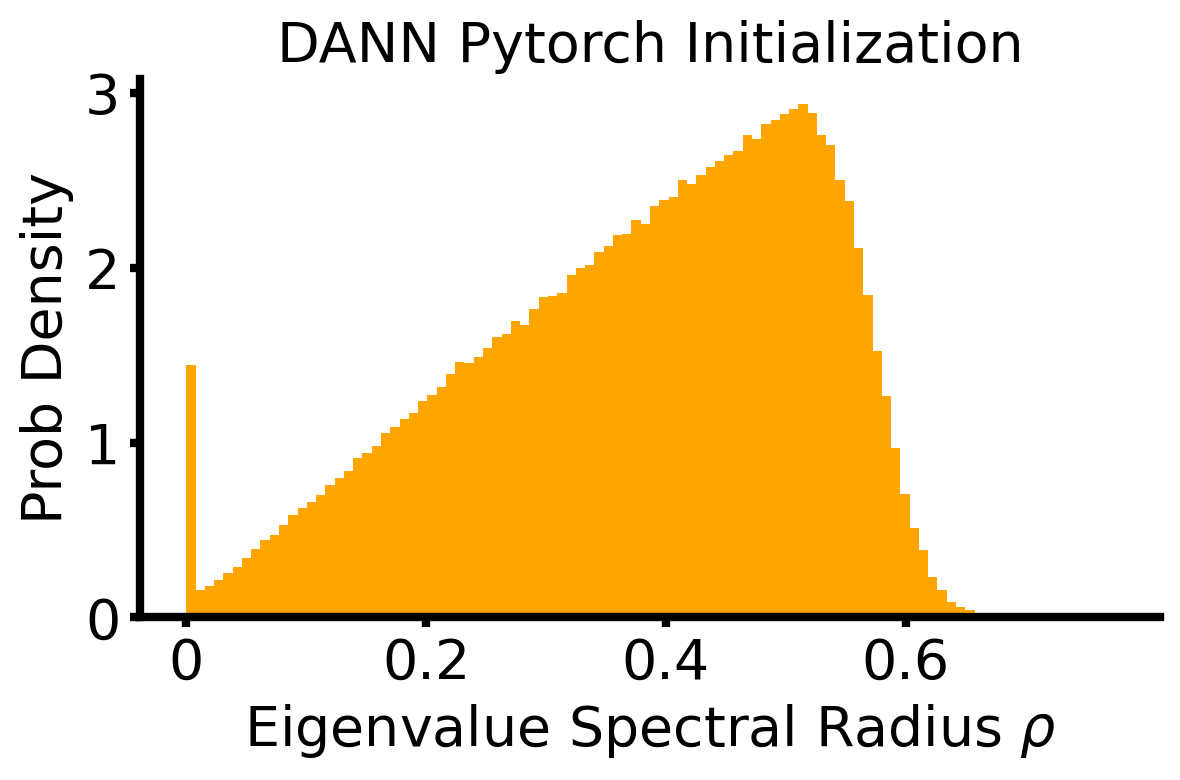

In [151]:
ax = plt.subplot(111)
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams["figure.figsize"] = (6,4)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)

ax.hist(np.sqrt(np.square(np.real(danns_eig))+np.square(np.imag(danns_eig))), bins=100, density=True, edgecolor='none', color='orange')

ax.set_title('DANN Pytorch Initialization', fontsize=20)
ax.set_xlabel(r"Eigenvalue Spectral Radius $\rho$", fontsize=20)
ax.set_ylabel("Prob Density", fontsize=20)
plt.yticks(ticks=[0, 1, 2, 3], size=20)
plt.xticks(labels=["0", "0.2", "0.4", "0.6"], ticks=[0, 0.2, 0.4, 0.6], size=20)
plt.tight_layout()
# plt.savefig('new_plots/Dist_Eigen_Rad_DANN.svg', format='svg', dpi=200)
# plt.savefig('new_plots/Dist_Eigen_Rad_DANN.png', format='png', dpi=200)
plt.show()

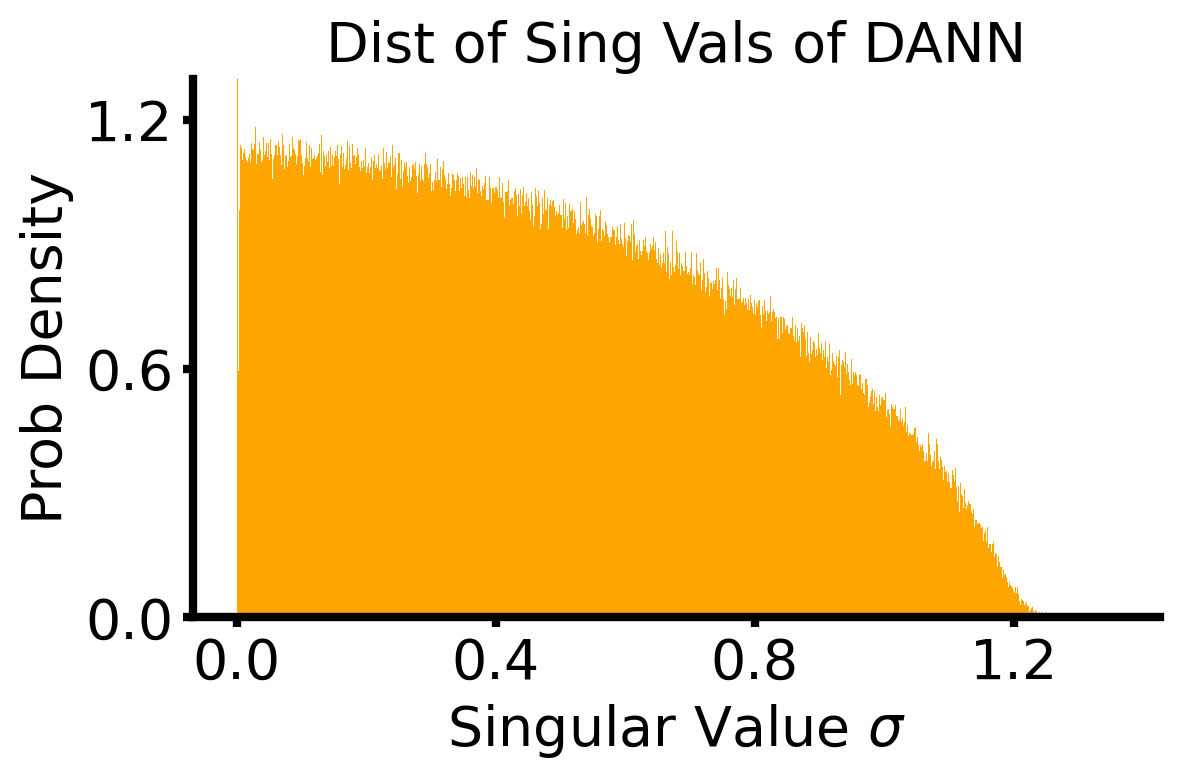

In [161]:
ax = plt.subplot(111)
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams["figure.figsize"] = (6,4)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)

ax.hist(danns_sv_before, bins=1000, density=True, edgecolor='none', color='orange')
plt.yticks(ticks=[0.0, 0.6, 1.2], size=20)
plt.xticks(ticks=[0.0, 0.4, 0.8, 1.2], size=20)
plt.xlabel(r"Singular Value $\sigma$", fontsize=20)
plt.ylabel("Prob Density", fontsize=20)
plt.ylim([0, 1.3])
plt.title(r"Dist of Sing Vals of DANN", fontsize=20)
plt.tight_layout()
plt.savefig('new_plots/SV_DANN.png', format='png', dpi=200)
plt.savefig('new_plots/SV_DANN.svg', format='svg', dpi=200)
plt.show()

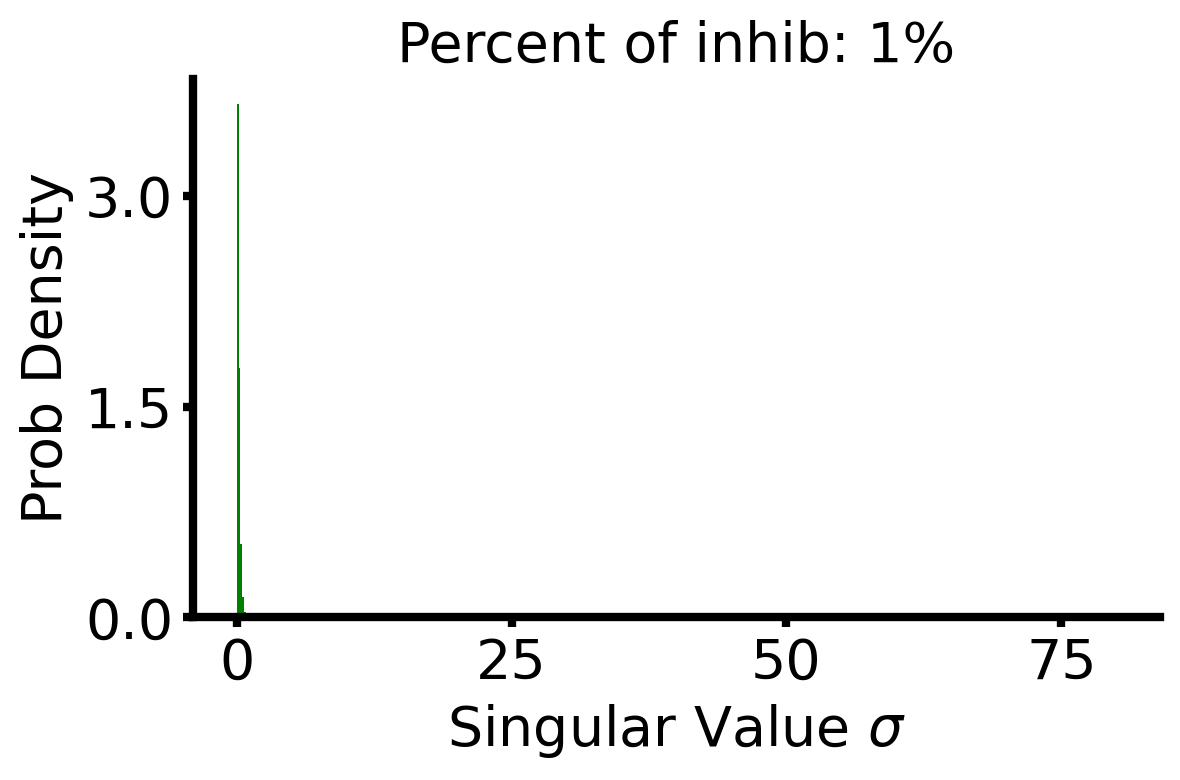

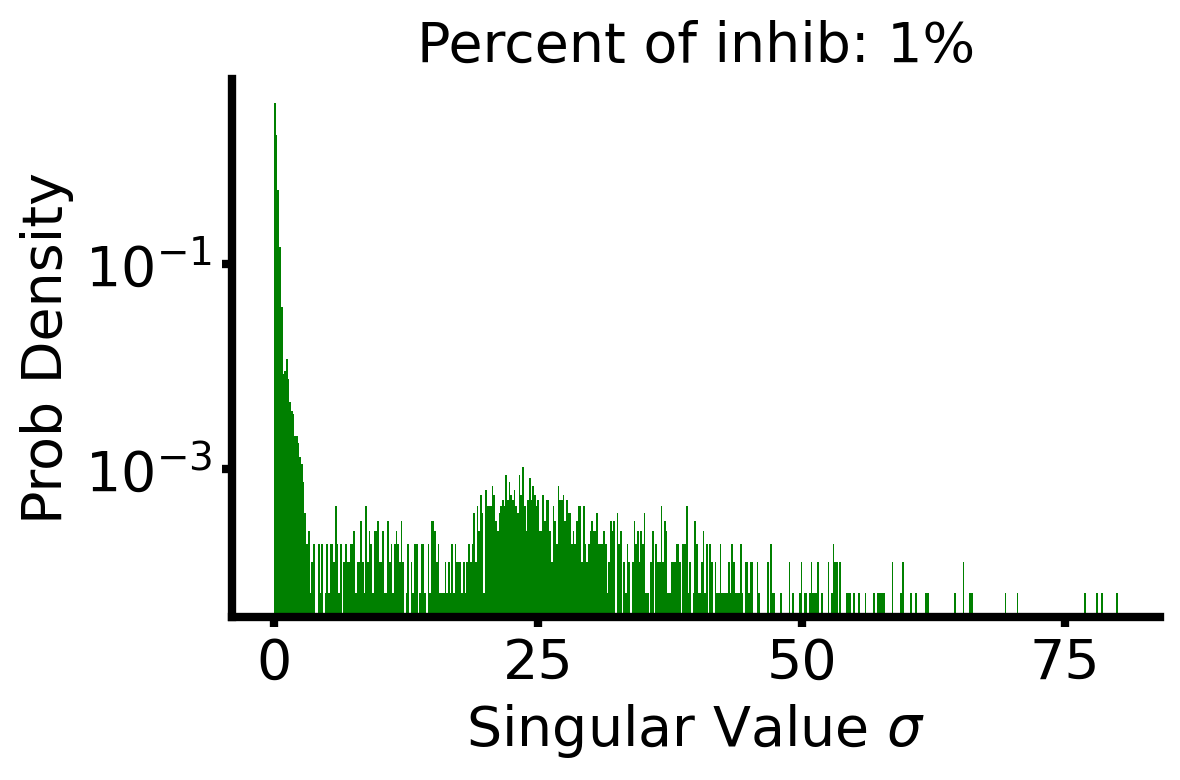

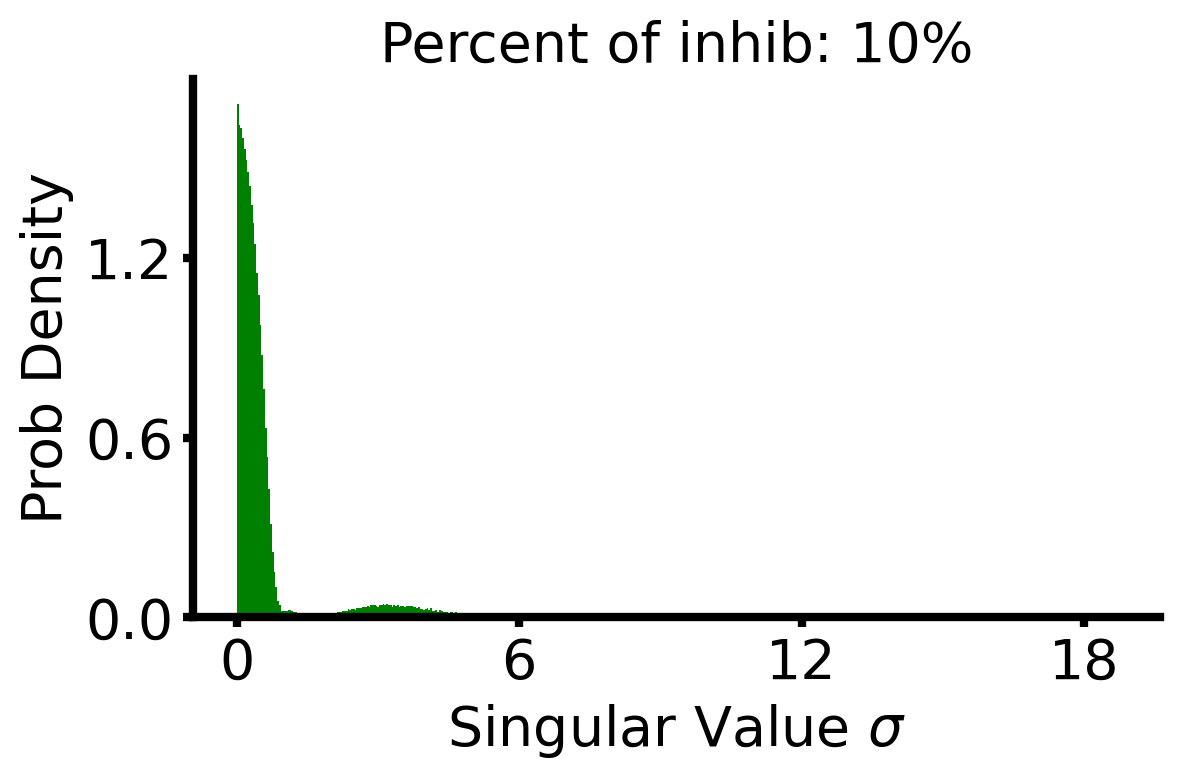

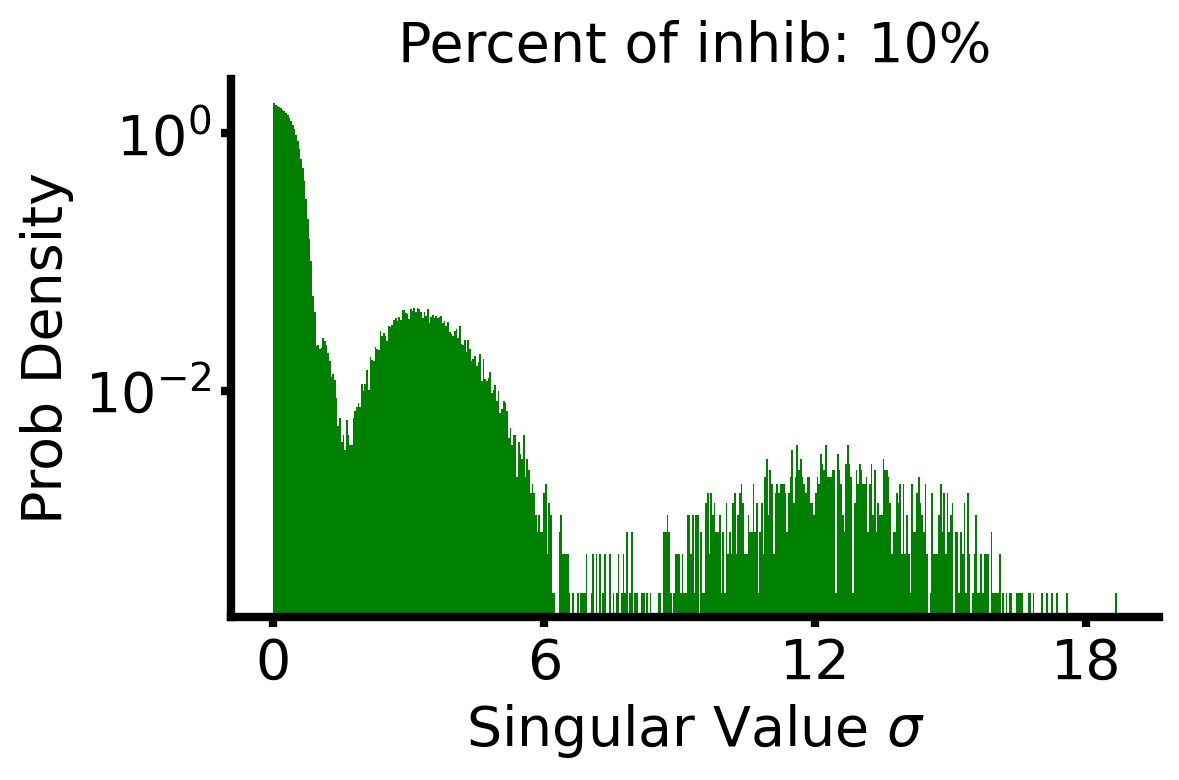

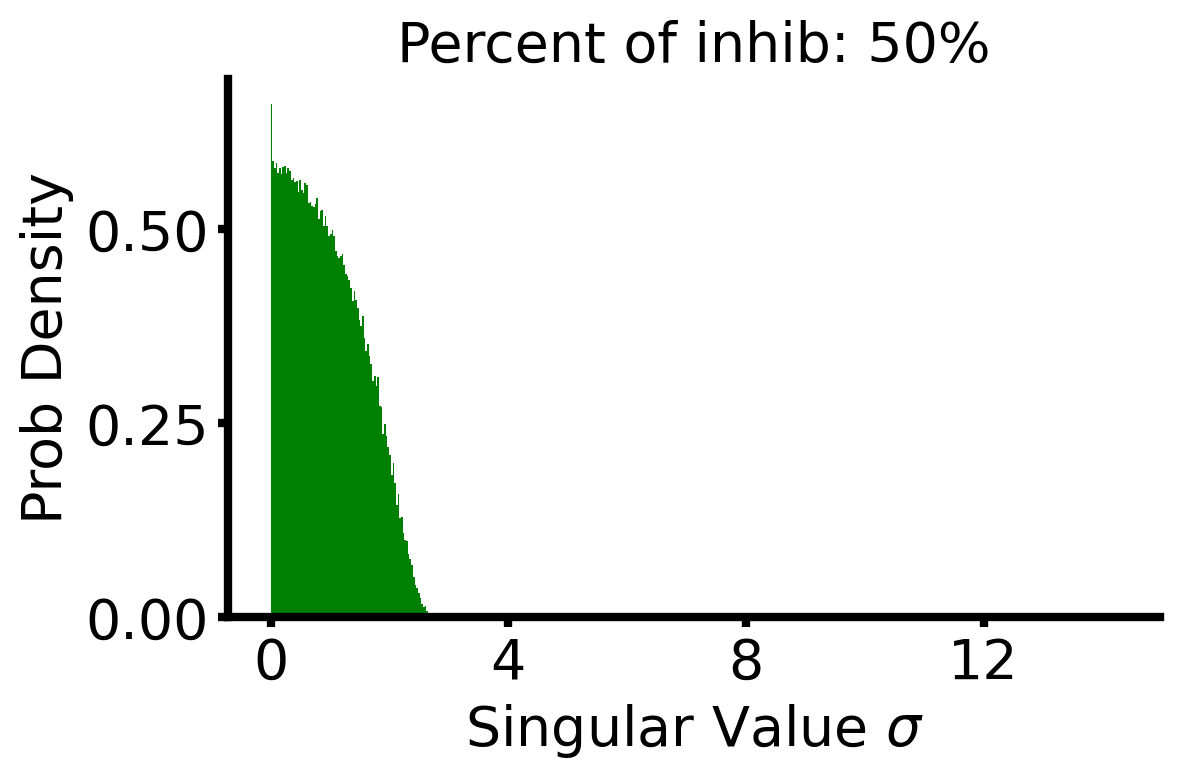

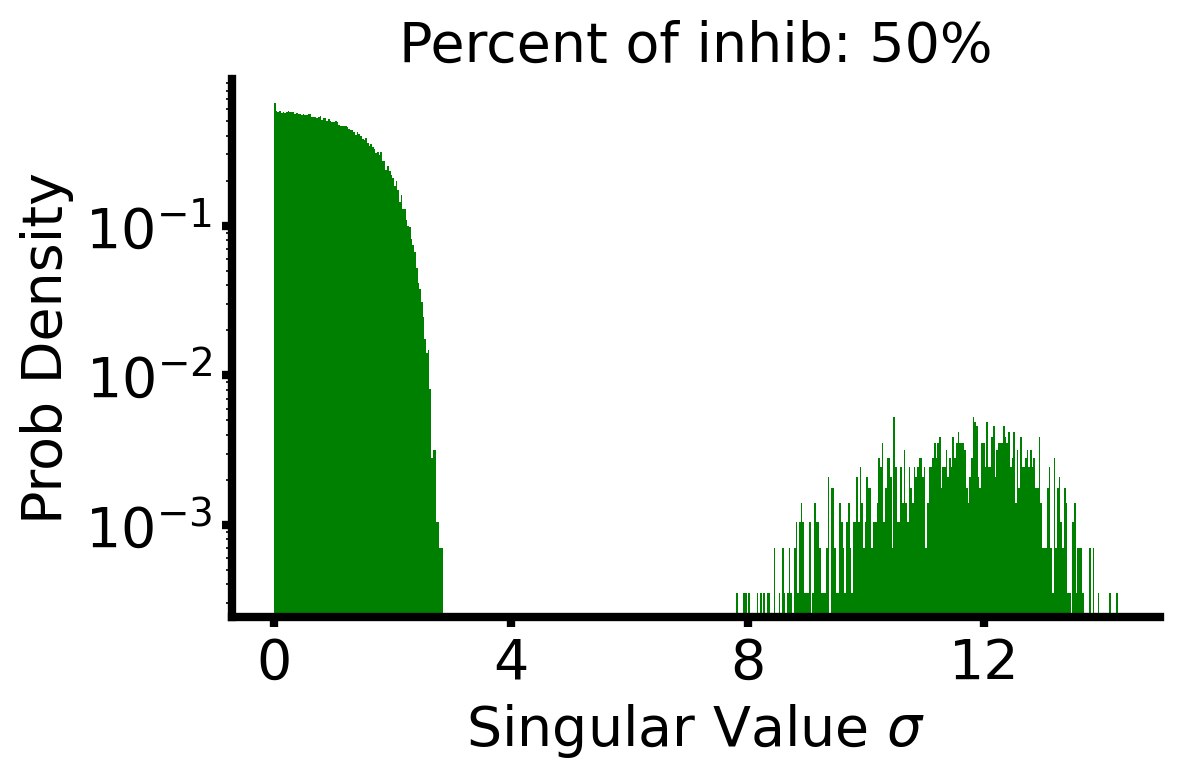

In [4]:
from matplotlib.ticker import MaxNLocator
n_stimulations = 1000
n_units = 100
rho = 1.5
n_inhs = [1, 10, 50]

song_sv_before = np.zeros(n_stimulations*(n_units))
largest = np.zeros(n_stimulations)
for ind, n_inh in enumerate(n_inhs):
    
    denom = ((2 * np.pi - 1) / (2 * np.pi)) * ((n_units-n_inh) + ((n_units-n_inh)) ** 2 / n_inh)

    sigma_we = np.sqrt(1/denom)
    sigma_wi = ((n_units-n_inh)/n_inh) * sigma_we

    for i in range(n_stimulations):
        song_matr_pos = np.random.exponential(scale=sigma_we, size=(n_units, n_units-n_inh))
        song_matr_neg = -np.random.exponential(scale=sigma_wi, size=(n_units, n_inh))
        song_matr = np.concatenate((song_matr_pos, song_matr_neg), axis=1)

        # np.fill_diagonal(song_matr, 0) # This won't affect the result
        
        eigen = np.linalg.eigvals(song_matr)
        largest[i]=np.max( np.sqrt(np.power(np.real(eigen), 2) + np.power(np.imag(eigen), 2)) )
        song_matr = song_matr*rho/largest[i]
        
        _, song_sigma, _ = np.linalg.svd(song_matr)
        largest[i] = np.max(song_sigma)
        song_sv_before[n_units*i:(n_units)*(i+1)] = song_sigma

    ax = plt.subplot(111)
    matplotlib.rcParams['figure.dpi'] = 200
    matplotlib.rcParams["figure.figsize"] = (6,4)

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_linewidth(3)
    ax.spines.bottom.set_linewidth(3)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)
    ax.yaxis.set_major_locator(MaxNLocator(3))
    ax.xaxis.set_major_locator(MaxNLocator(4))
    ax.hist(song_sv_before, bins=500, density=True, edgecolor='none', color='g')
    ax.set_xlabel(fr'Singular Value $\sigma$', fontsize=20)
    ax.set_ylabel(f'Prob Density', fontsize=20)
    ax.set_title(f'Percent of inhib: {int(n_inh*100/n_units)}%', fontsize=20)
    plt.tight_layout()
    plt.savefig(f'new_plots/Song_SV_inhib{n_inh}.png', format='png', dpi=200)
    plt.savefig(f'new_plots/Song_SV_inhib{n_inh}.svg', format='svg', dpi=200)
    plt.show()
    
    ax = plt.subplot(111)
    matplotlib.rcParams['figure.dpi'] = 200
    matplotlib.rcParams["figure.figsize"] = (6,4)

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_linewidth(3)
    ax.spines.bottom.set_linewidth(3)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)
    ax.yaxis.set_major_locator(MaxNLocator(3))
    ax.xaxis.set_major_locator(MaxNLocator(4))
    plt.yscale('log')
    ax.hist(song_sv_before, bins=500, density=True, edgecolor='none', color='g')
    ax.set_xlabel(r'Singular Value $\sigma$', fontsize=20)
    ax.set_ylabel(f'Prob Density', fontsize=20)
    ax.set_title(f'Percent of inhib: {int(n_inh*100/n_units)}%', fontsize=20)
    plt.tight_layout()
# b
    plt.show()
    

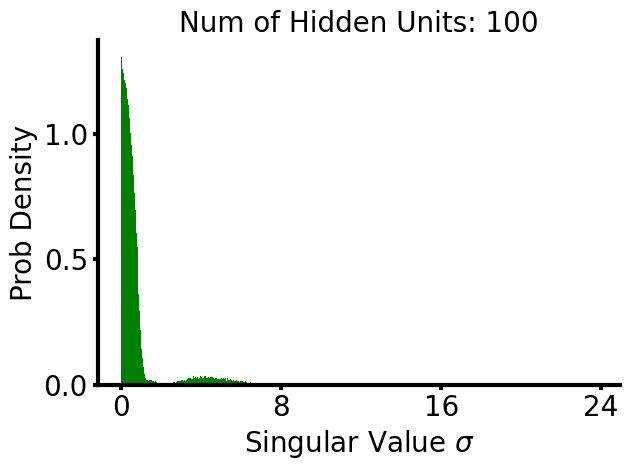

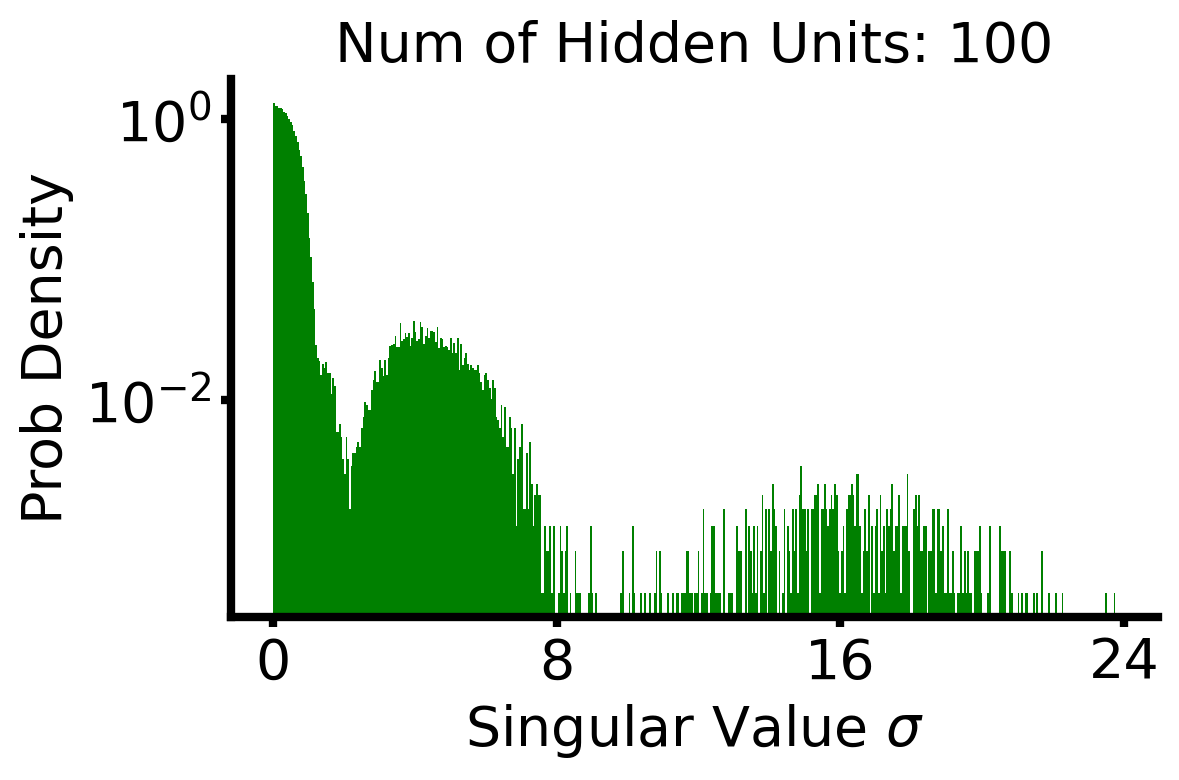

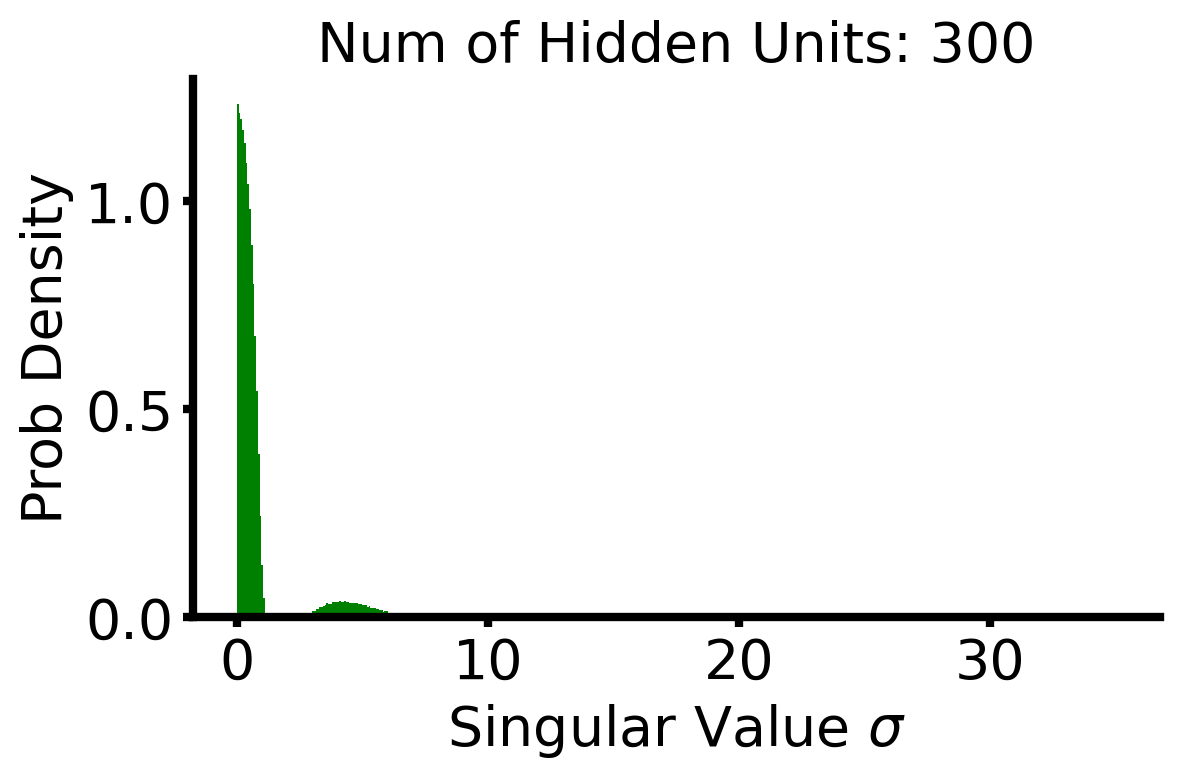

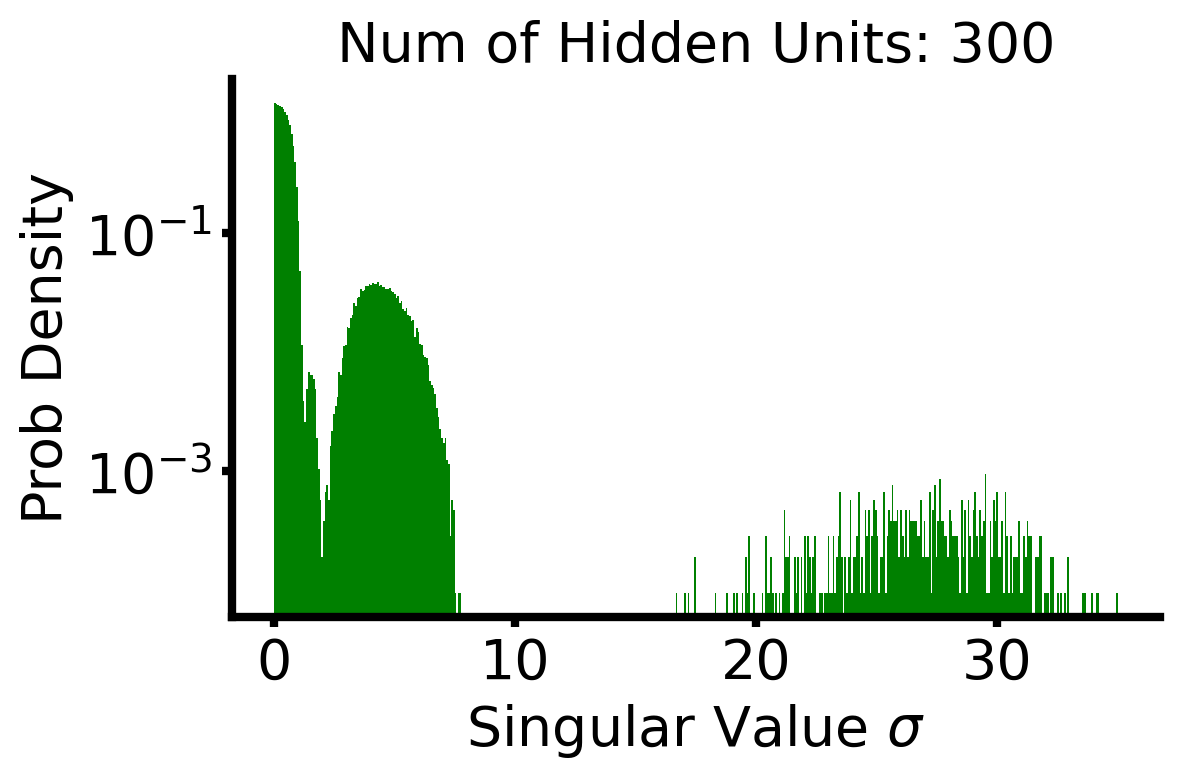

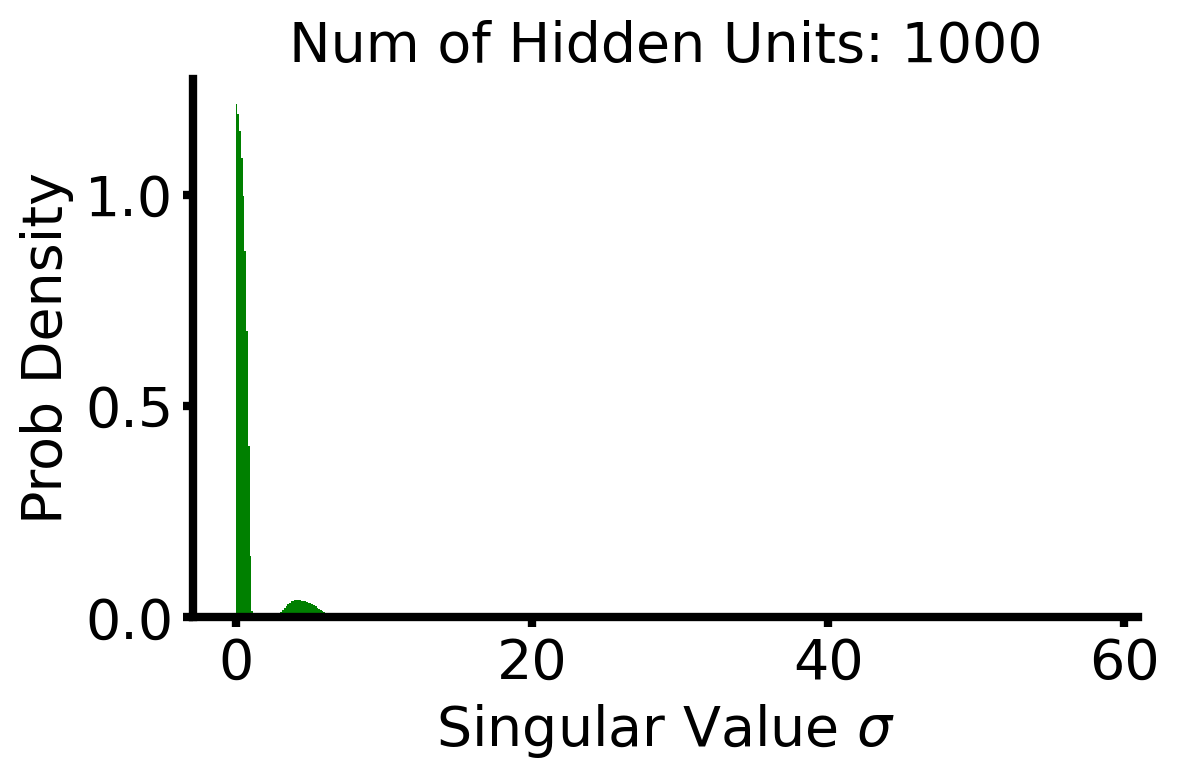

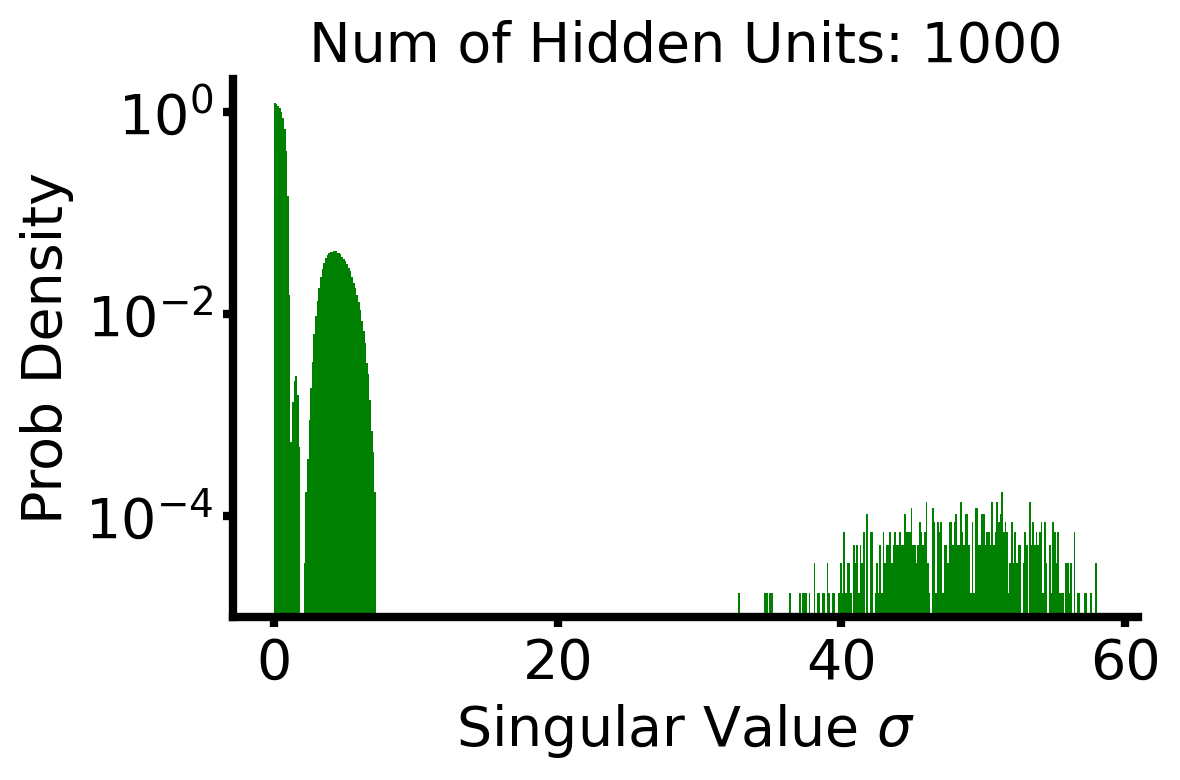

In [2]:
n_stimulations = 500
n_hiddens = [100, 300, 1000]
rho = 2
largest = np.zeros(n_stimulations)

for ind, n_hidden in enumerate(n_hiddens):
    song_sv_before = np.zeros(n_stimulations*(n_hidden))
    n_inh = n_hidden//10
    denom = ((2 * np.pi - 1) / (2 * np.pi)) * ((n_hidden-n_inh) + ((n_hidden-n_inh)) ** 2 / n_inh)
    # denom = (n_excitation + n_inhibition)

    sigma_we = np.sqrt(1/denom)
    sigma_wi = ((n_hidden-n_inh)/n_inh) * sigma_we
    # sigma_wi = sigma_we

    for i in range(n_stimulations):
        song_matr_pos = np.random.exponential(scale=sigma_we, size=(n_hidden, n_hidden-n_inh))
        song_matr_neg = -np.random.exponential(scale=sigma_wi, size=(n_hidden, n_inh))
        song_matr = np.concatenate((song_matr_pos, song_matr_neg), axis=1)

        # np.fill_diagonal(song_matr, 0) # This won't affect the result
        
        eigen = np.linalg.eigvals(song_matr)
        largest[i]=np.max( np.sqrt(np.power(np.real(eigen), 2) + np.power(np.imag(eigen), 2)) )
        # print(np.real(eigen))
        song_matr = song_matr*rho/largest[i]
        
        _, song_sigma, _ = np.linalg.svd(song_matr)
        # print(song_sigma)
        largest[i] = np.max(song_sigma)
        song_sv_before[n_hidden*i:(n_hidden)*(i+1)] = song_sigma
    # plt.hist(song_sv_before, bins=300, density=True, edgecolor='none')
    ax = plt.subplot(111)
    matplotlib.rcParams['figure.dpi'] = 200
    matplotlib.rcParams["figure.figsize"] = (6,4)

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_linewidth(3)
    ax.spines.bottom.set_linewidth(3)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)
    ax.yaxis.set_major_locator(MaxNLocator(3))
    ax.xaxis.set_major_locator(MaxNLocator(4))
    ax.hist(song_sv_before, bins=500, density=True, edgecolor='none', color='g')
    ax.set_xlabel(fr'Singular Value $\sigma$', fontsize=20)
    ax.set_ylabel(f'Prob Density', fontsize=20)
    ax.set_title(f'Num of Hidden Units: {n_hidden}', fontsize=20)
    plt.tight_layout()
    plt.savefig(f'new_plots/Song_SV_hidden{n_hidden}_rad2.png', format='png', dpi=200)
    plt.savefig(f'new_plots/Song_SV_hidden{n_hidden}_rad2.svg', format='svg', dpi=200)
    plt.show()
    
    ax = plt.subplot(111)
    matplotlib.rcParams['figure.dpi'] = 200
    matplotlib.rcParams["figure.figsize"] = (6,4)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_linewidth(3)
    ax.spines.bottom.set_linewidth(3)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)
    ax.yaxis.set_major_locator(MaxNLocator(3))
    ax.xaxis.set_major_locator(MaxNLocator(4))
    ax.set_yscale('log')
    ax.hist(song_sv_before, bins=500, density=True, edgecolor='none', color='g')
    ax.set_xlabel(fr'Singular Value $\sigma$', fontsize=20)
    ax.set_ylabel(f'Prob Density', fontsize=20)
    ax.set_title(f'Num of Hidden Units: {n_hidden}', fontsize=20)
    plt.tight_layout()
    plt.savefig(f'new_plots/Song_SV_hidden{n_hidden}_log_rad2.png', format='png', dpi=200)
    plt.savefig(f'new_plots/Song_SV_hidden{n_hidden}_log_rad2.svg', format='svg', dpi=200)
    plt.show()
# plt.savefig('Song_sv_dist_dif_inhib.jpg', format='jpg')
# plt.savefig('Song_sv_dist_dif_inhib.eps', format='eps')
# plt.savefig('Song_sv_dist_dif_inhib.tiff', format='tiff')

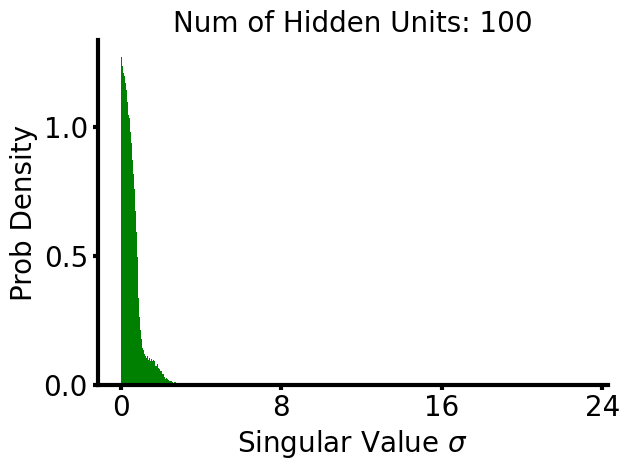

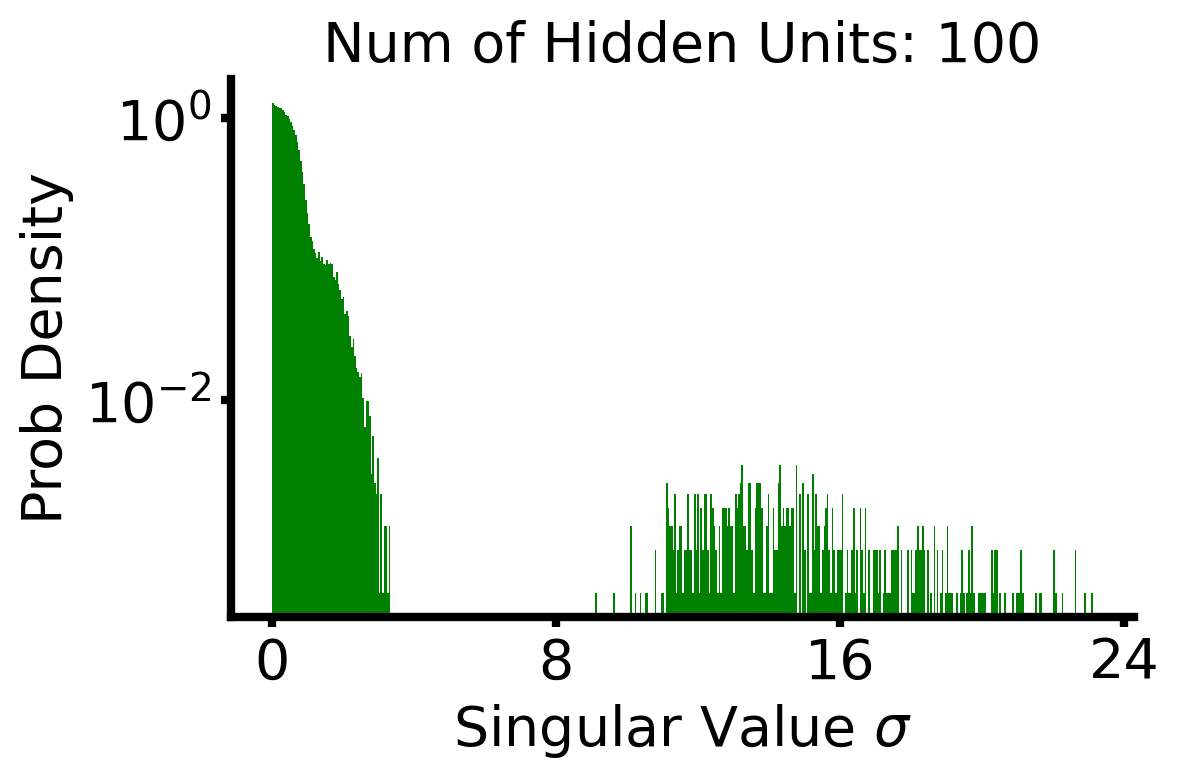

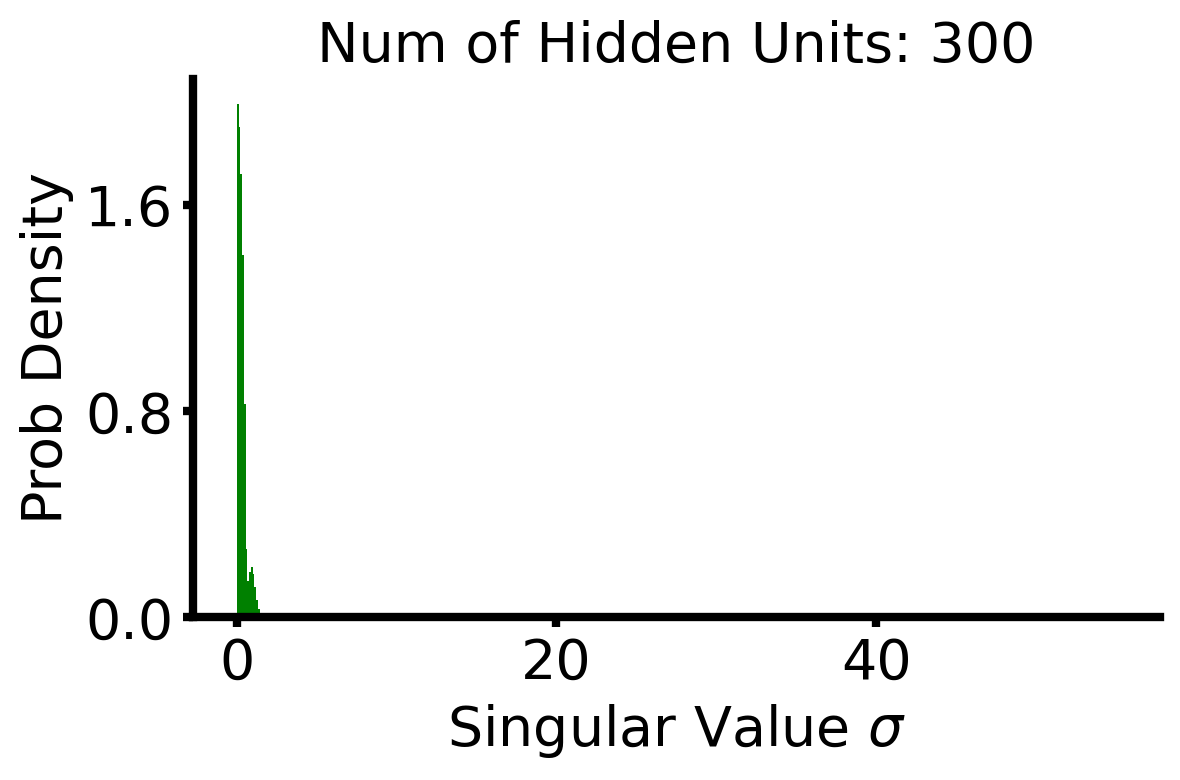

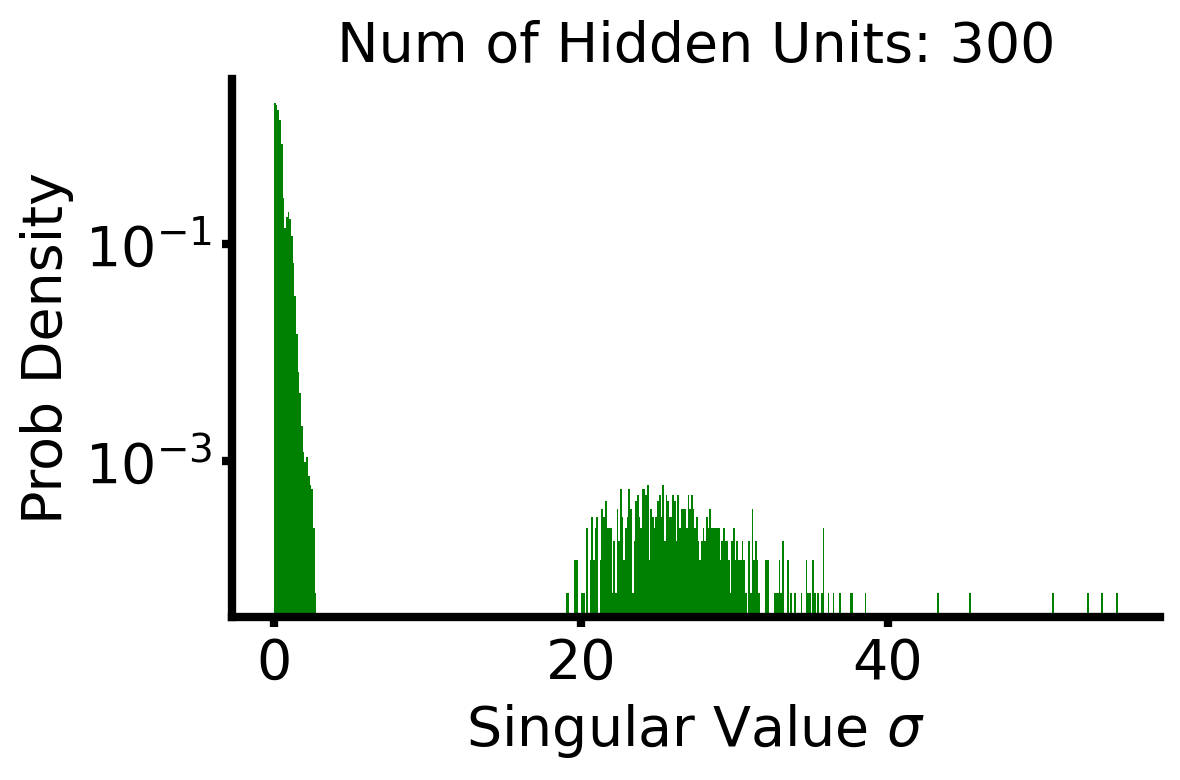

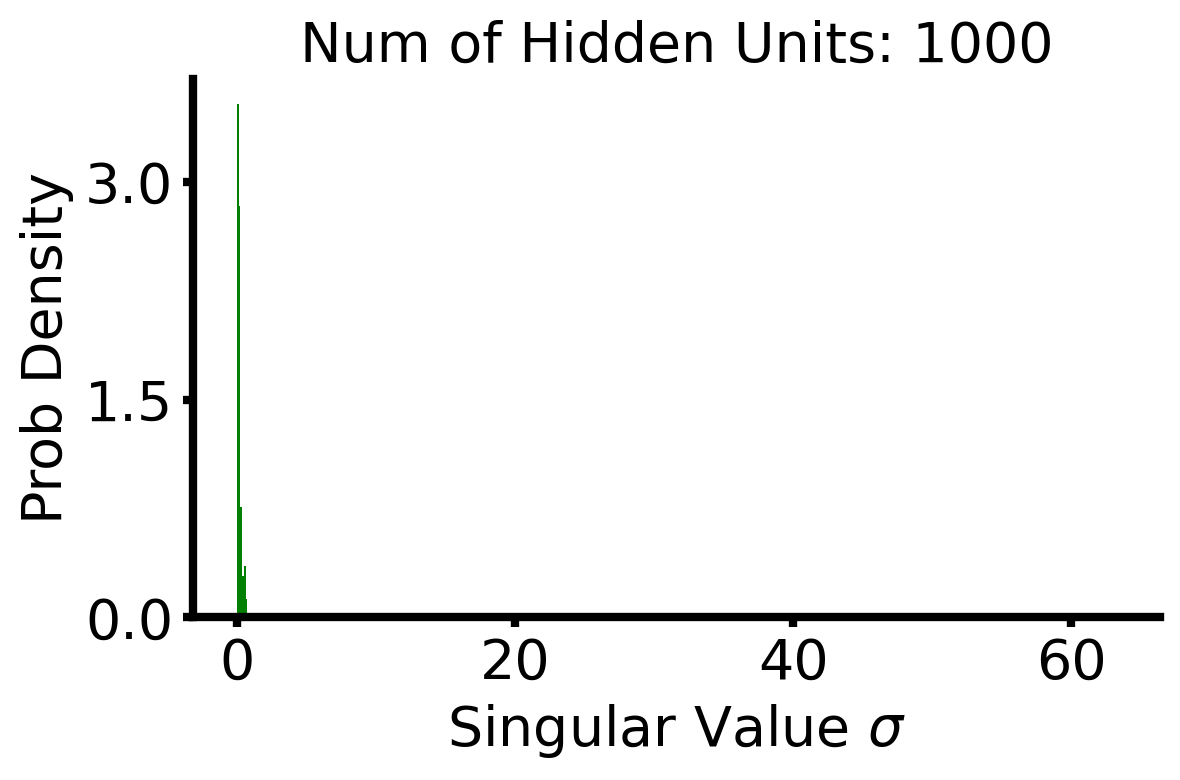

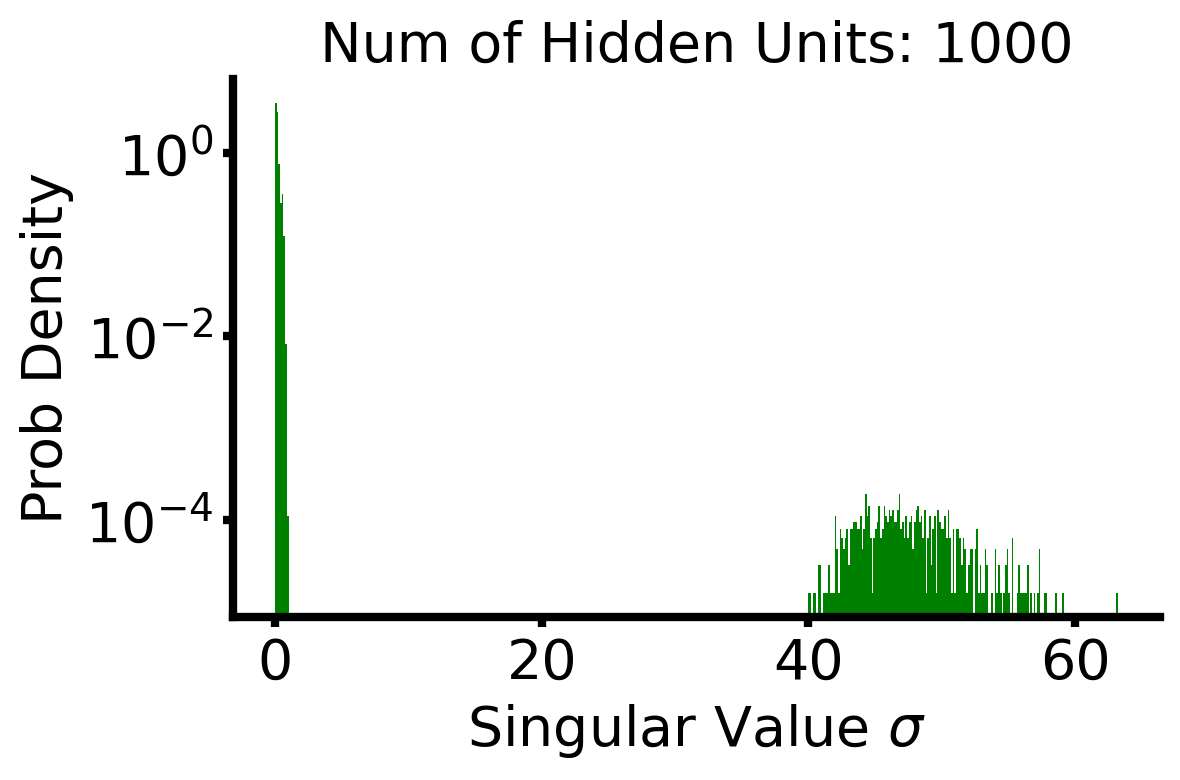

In [4]:
n_stimulations = 500
n_hiddens = [100, 300, 1000]
rho = 1.5
largest = np.zeros(n_stimulations)

for ind, n_hidden in enumerate(n_hiddens):
    song_sv_before = np.zeros(n_stimulations*(n_hidden))
    n_inh = n_hidden//10
    n_exc = n_hidden - n_inh

    exc_mean = .1
    inh_mean = exc_mean*(n_exc/n_inh)
    exc_var = 1/n_exc
    inh_var = 1/n_inh
    theta_e = exc_var/exc_mean
    k_e = (exc_mean**2)/exc_var
    theta_i = inh_var/inh_mean
    k_i = (inh_mean**2)/inh_var

    for i in range(n_stimulations):
        song_matr_pos = np.random.gamma(k_e, scale=theta_e, size=(n_hidden, n_hidden-n_inh))
        song_matr_neg = -np.random.gamma(k_i, scale=theta_i, size=(n_hidden, n_inh))
        song_matr = np.concatenate((song_matr_pos, song_matr_neg), axis=1)

        # np.fill_diagonal(song_matr, 0) # This won't affect the result
        
        eigen = np.linalg.eigvals(song_matr)
        largest[i]=np.max( np.sqrt(np.power(np.real(eigen), 2) + np.power(np.imag(eigen), 2)) )

        song_matr = song_matr*rho/largest[i]
        
        _, song_sigma, _ = np.linalg.svd(song_matr)

        largest[i] = np.max(song_sigma)
        song_sv_before[n_hidden*i:(n_hidden)*(i+1)] = song_sigma

    ax = plt.subplot(111)
    matplotlib.rcParams['figure.dpi'] = 200
    matplotlib.rcParams["figure.figsize"] = (6,4)

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_linewidth(3)
    ax.spines.bottom.set_linewidth(3)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)
    ax.yaxis.set_major_locator(MaxNLocator(3))
    ax.xaxis.set_major_locator(MaxNLocator(4))
    ax.hist(song_sv_before, bins=500, density=True, edgecolor='none', color='g')
    ax.set_xlabel(fr'Singular Value $\sigma$', fontsize=20)
    ax.set_ylabel(f'Prob Density', fontsize=20)
    ax.set_title(f'Num of Hidden Units: {n_hidden}', fontsize=20)
    plt.tight_layout()
#     plt.savefig(f'new_plots/Gamma_Song_SV_hidden{n_hidden}_rad1.5.png', format='png', dpi=200)
#     plt.savefig(f'new_plots/Gamma_Song_SV_hidden{n_hidden}_rad1.5.svg', format='svg', dpi=200)
    plt.show()
    
    ax = plt.subplot(111)
    matplotlib.rcParams['figure.dpi'] = 200
    matplotlib.rcParams["figure.figsize"] = (6,4)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_linewidth(3)
    ax.spines.bottom.set_linewidth(3)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)
    ax.yaxis.set_major_locator(MaxNLocator(3))
    ax.xaxis.set_major_locator(MaxNLocator(4))
    ax.set_yscale('log')
    ax.hist(song_sv_before, bins=500, density=True, edgecolor='none', color='g')
    ax.set_xlabel(fr'Singular Value $\sigma$', fontsize=20)
    ax.set_ylabel(f'Prob Density', fontsize=20)
    ax.set_title(f'Num of Hidden Units: {n_hidden}', fontsize=20)
    plt.tight_layout()
#     plt.savefig(f'new_plots/Gamma_Song_SV_hidden{n_hidden}_log_rad1.5.png', format='png', dpi=200)
#     plt.savefig(f'new_plots/Gamma_Song_SV_hidden{n_hidden}_log_rad1.5.svg', format='svg', dpi=200)
    plt.show()

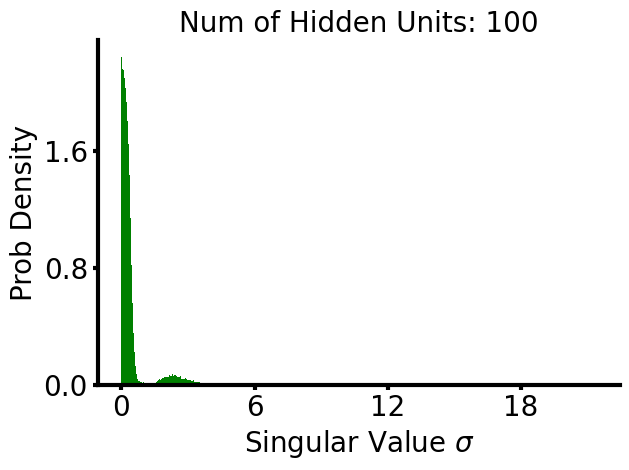

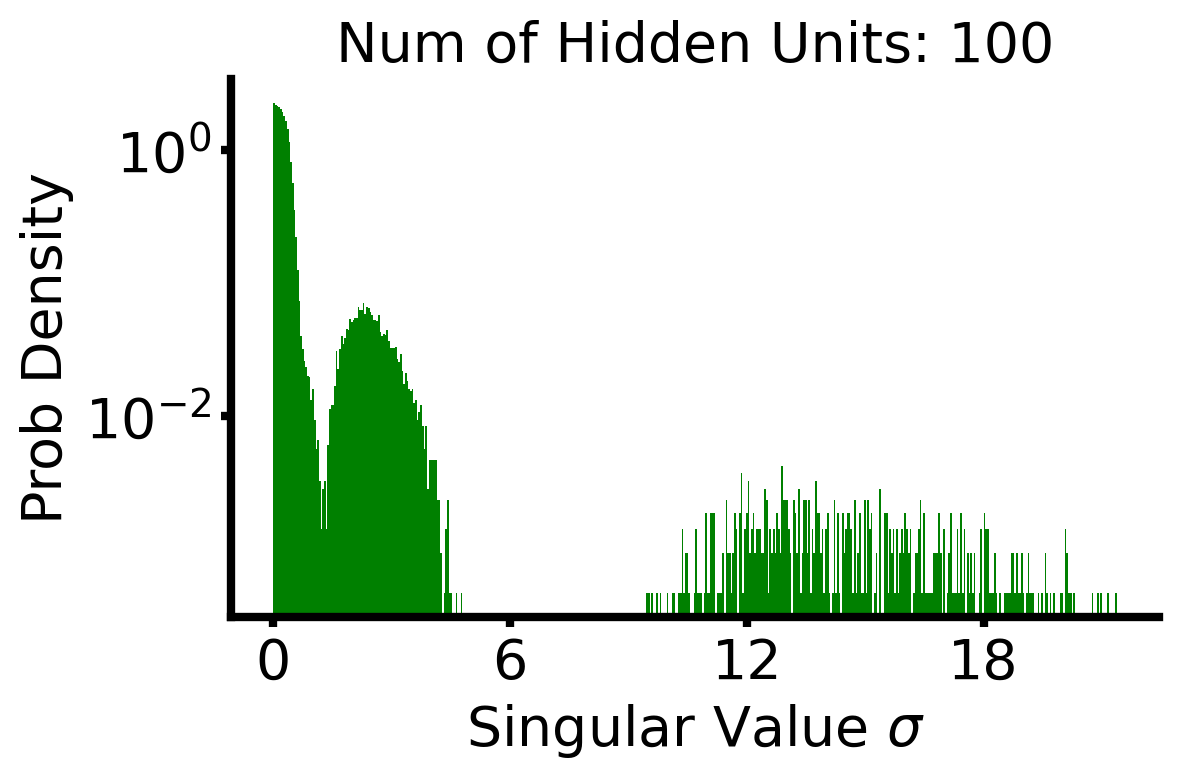

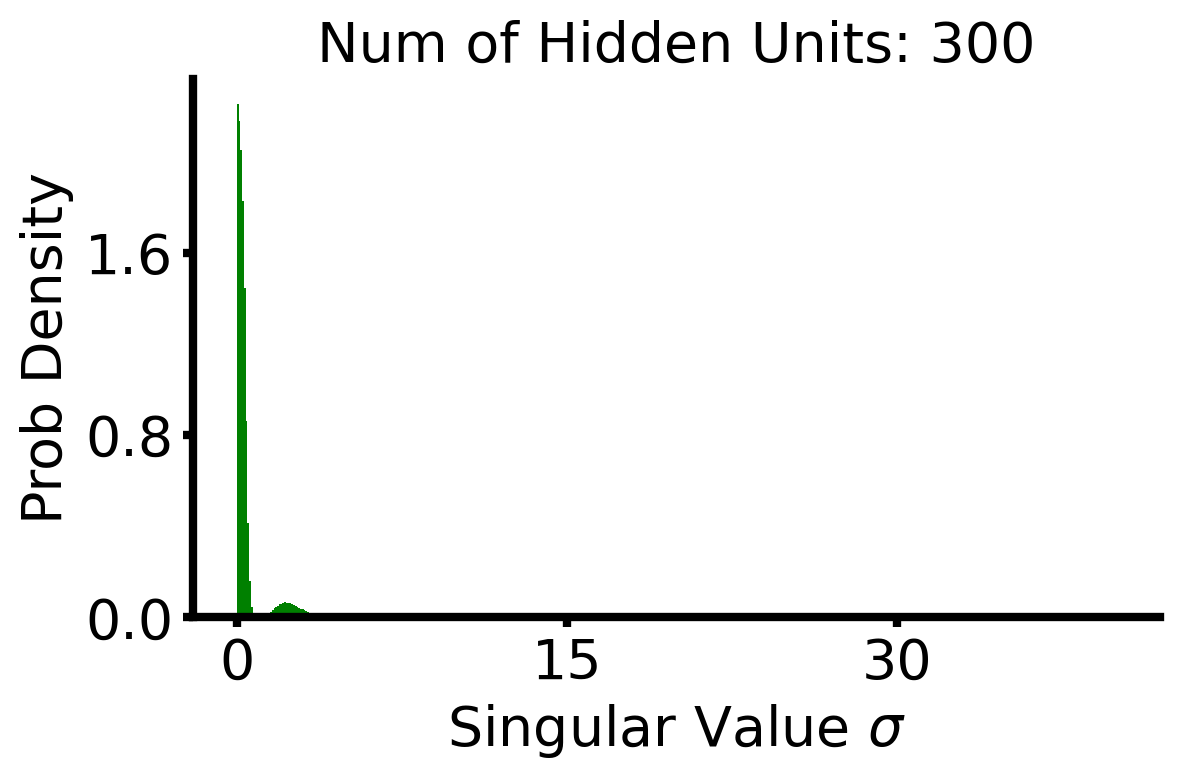

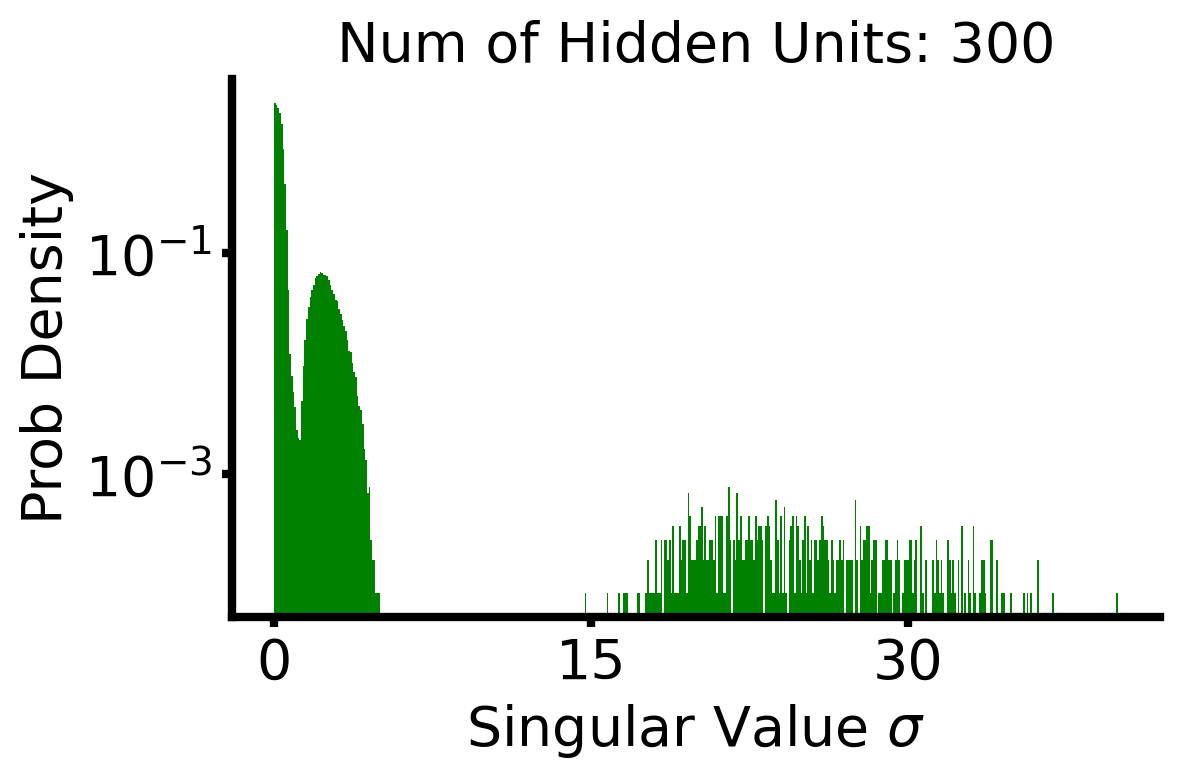

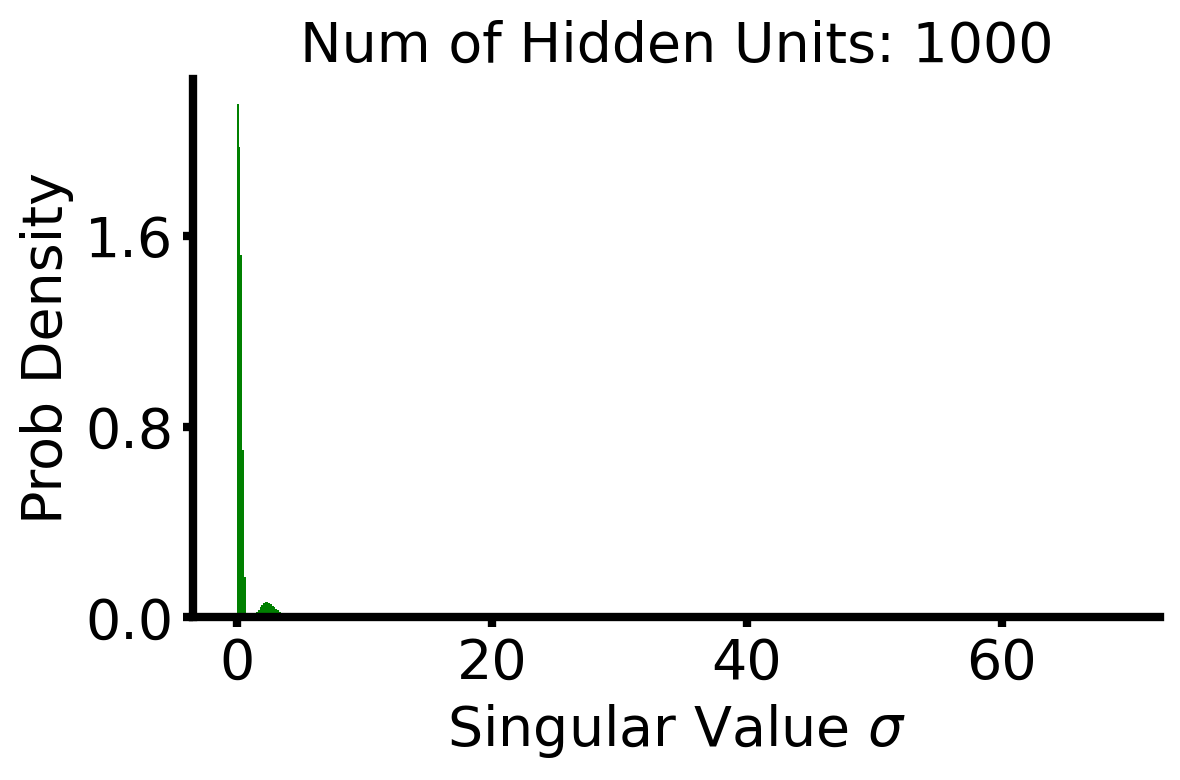

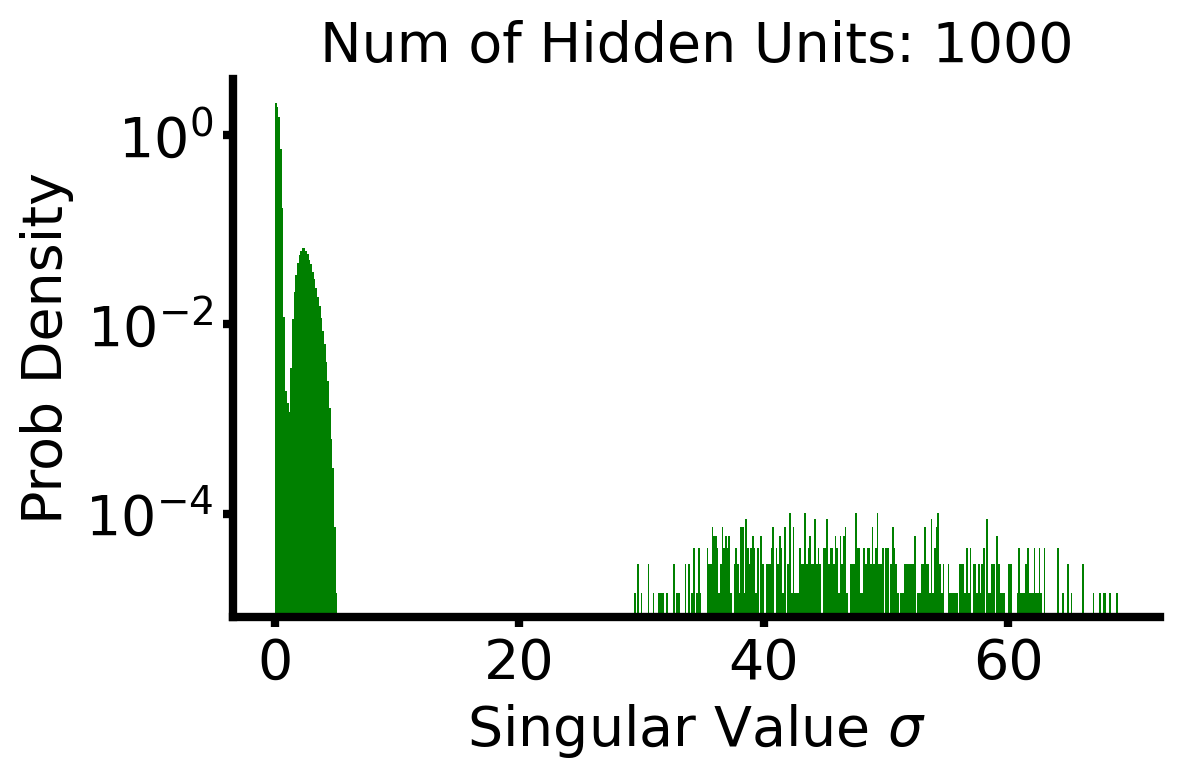

In [4]:
n_stimulations = 500
n_hiddens = [100, 300, 1000]
rho = 1.5
largest = np.zeros(n_stimulations)

for ind, n_hidden in enumerate(n_hiddens):
    song_sv_before = np.zeros(n_stimulations*(n_hidden))
    n_inh = n_hidden//10
    n_exc = n_hidden - n_inh

    exc_max = np.sqrt(1/n_hidden)
    inh_max = np.sqrt(1/n_hidden)*(n_exc/n_inh)
    for i in range(n_stimulations):
        song_matr_pos = np.random.uniform(0,exc_max, size=(n_hidden, n_hidden-n_inh))
        song_matr_neg = -np.random.uniform(0,inh_max, size=(n_hidden, n_inh))
        song_matr = np.concatenate((song_matr_pos, song_matr_neg), axis=1)

        np.fill_diagonal(song_matr, 0) # This won't affect the result
        
        eigen = np.linalg.eigvals(song_matr)
        largest[i]=np.max( np.sqrt(np.power(np.real(eigen), 2) + np.power(np.imag(eigen), 2)) )
        # print(np.real(eigen))
        song_matr = song_matr*rho/largest[i]
        
        _, song_sigma, _ = np.linalg.svd(song_matr)
        # print(song_sigma)
        largest[i] = np.max(song_sigma)
        song_sv_before[n_hidden*i:(n_hidden)*(i+1)] = song_sigma
    # plt.hist(song_sv_before, bins=300, density=True, edgecolor='none')
    ax = plt.subplot(111)
    matplotlib.rcParams['figure.dpi'] = 200
    matplotlib.rcParams["figure.figsize"] = (6,4)

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_linewidth(3)
    ax.spines.bottom.set_linewidth(3)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)
    ax.yaxis.set_major_locator(MaxNLocator(3))
    ax.xaxis.set_major_locator(MaxNLocator(4))
    ax.hist(song_sv_before, bins=500, density=True, edgecolor='none', color='g')
    ax.set_xlabel(fr'Singular Value $\sigma$', fontsize=20)
    ax.set_ylabel(f'Prob Density', fontsize=20)
    ax.set_title(f'Num of Hidden Units: {n_hidden}', fontsize=20)
    plt.tight_layout()
    plt.savefig(f'new_plots/Uniform_Song_SV_hidden{n_hidden}_rad1.5.png', format='png', dpi=200)
    plt.savefig(f'new_plots/Uniform_Song_SV_hidden{n_hidden}_rad1.5.svg', format='svg', dpi=200)
    plt.show()
    
    ax = plt.subplot(111)
    matplotlib.rcParams['figure.dpi'] = 200
    matplotlib.rcParams["figure.figsize"] = (6,4)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_linewidth(3)
    ax.spines.bottom.set_linewidth(3)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)
    ax.yaxis.set_major_locator(MaxNLocator(3))
    ax.xaxis.set_major_locator(MaxNLocator(4))
    ax.set_yscale('log')
    ax.hist(song_sv_before, bins=500, density=True, edgecolor='none', color='g')
    ax.set_xlabel(fr'Singular Value $\sigma$', fontsize=20)
    ax.set_ylabel(f'Prob Density', fontsize=20)
    ax.set_title(f'Num of Hidden Units: {n_hidden}', fontsize=20)
    plt.tight_layout()
    plt.savefig(f'new_plots/Uniform_Song_SV_hidden{n_hidden}_log_rad1.5.png', format='png', dpi=200)
    plt.savefig(f'new_plots/Uniform_Song_SV_hidden{n_hidden}_log_rad1.5.svg', format='svg', dpi=200)
    plt.show()

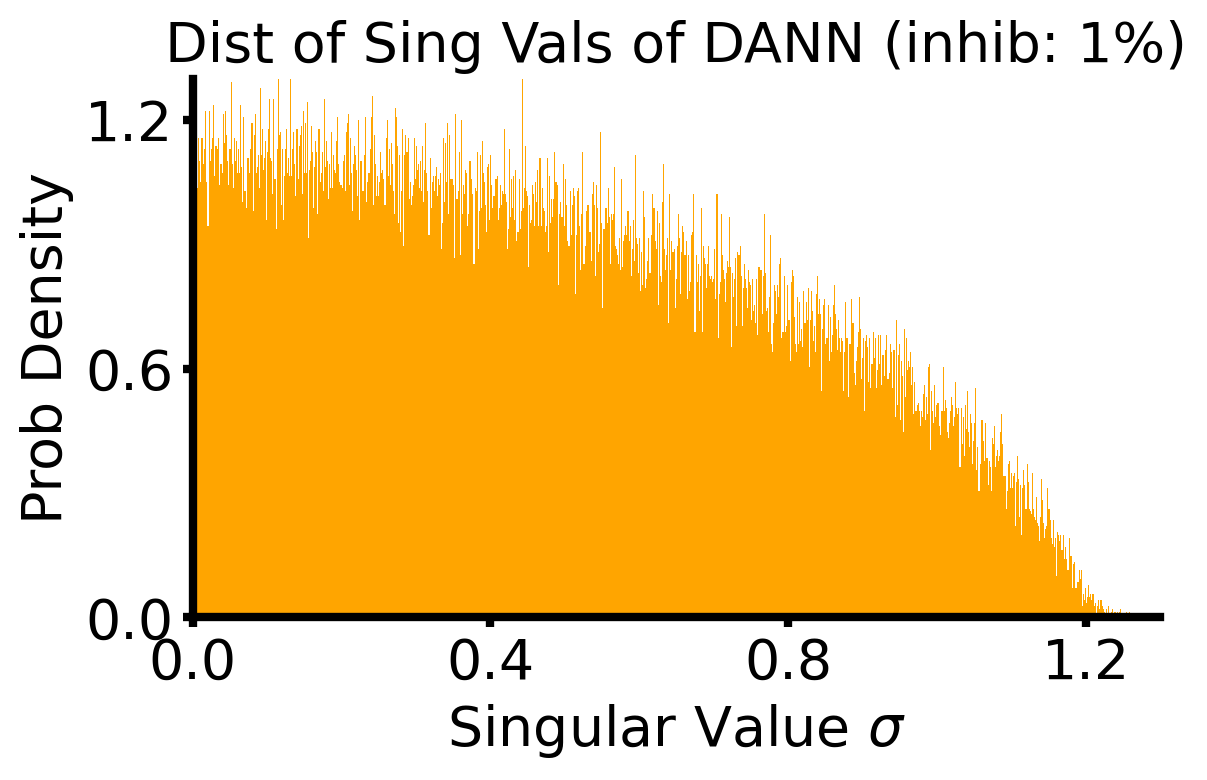

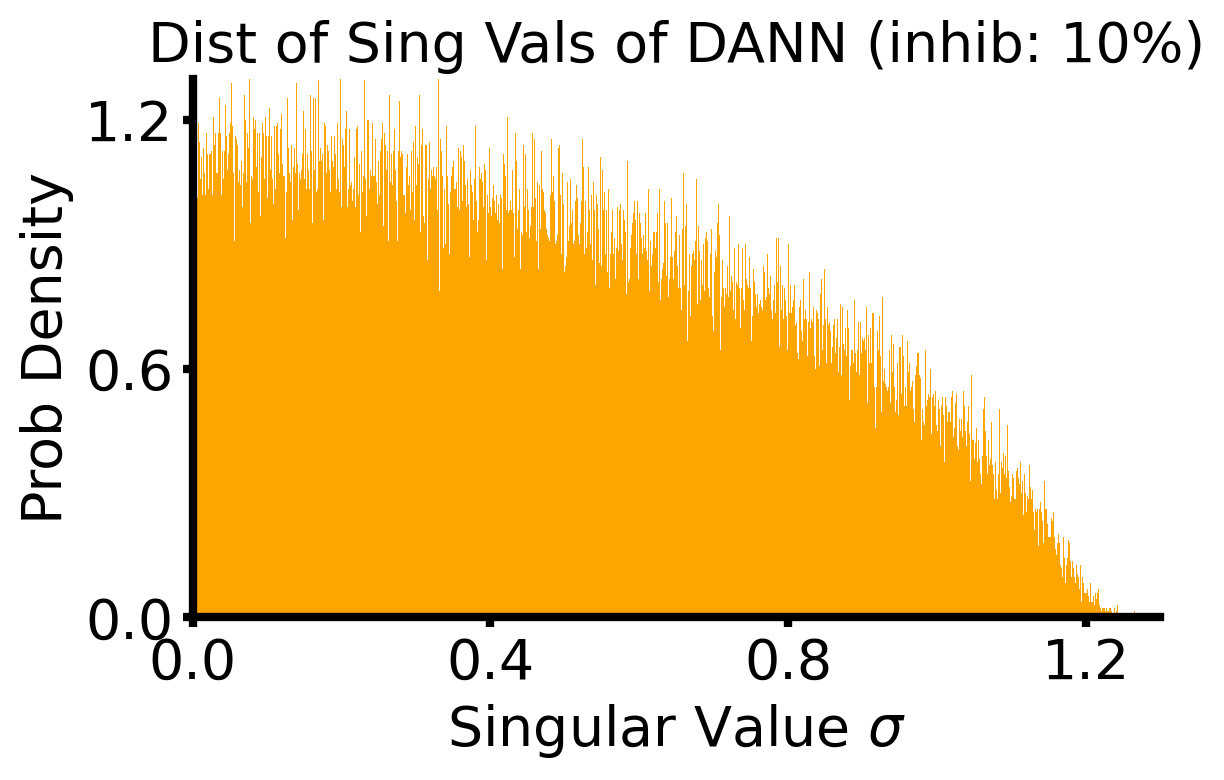

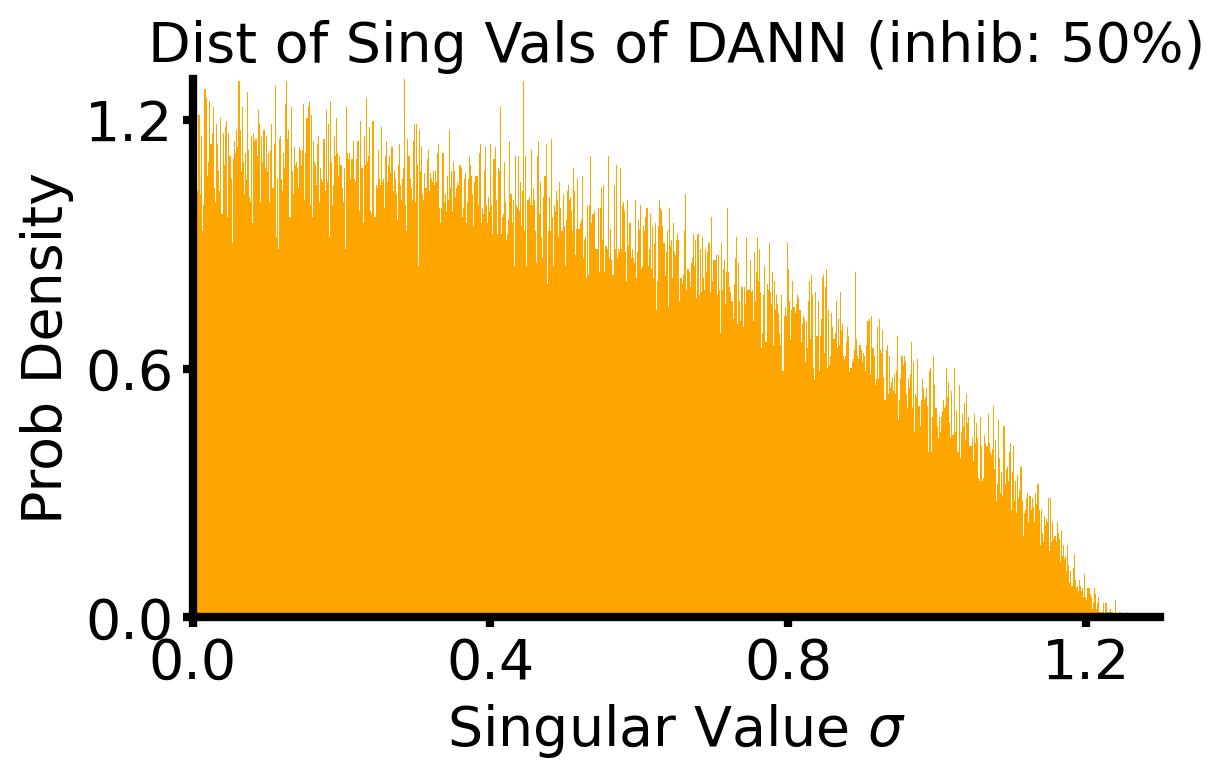

In [7]:
ne=100
num=1/3  # 1/3 for pytorch
n_stimulations = 1000
danns_sv_before = np.zeros(ne*n_stimulations)

ni_s = [1, 10, 50]

for ind, ni in enumerate(ni_s):

    for i in range(n_stimulations):
        Wex = np.random.exponential(size=(ne, ne), scale=np.sqrt( (ne/((ne-1)) * ((num))/ne))) 
        Wix = (np.ones((ni, 1))) @ np.mean(Wex, axis=0, keepdims=True)
        Wei = np.random.exponential(size=(ne, ni), scale=np.sqrt( (ne/((ne-1)) * ((num))/ne)))
        Wei /= Wei.sum(axis=1, keepdims=True)
        danns_matrix = Wex - (Wei @ Wix)

        _, danns_sigma, _ = np.linalg.svd(danns_matrix)
        danns_sv_before[ne*i:ne*(i+1)] = danns_sigma
    ax = plt.subplot(111)
    matplotlib.rcParams['figure.dpi'] = 200
    matplotlib.rcParams["figure.figsize"] = (6,4)

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_linewidth(3)
    ax.spines.bottom.set_linewidth(3)
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)

    ax.hist(danns_sv_before, bins=1000, density=True, edgecolor='none', color='orange')
    plt.yticks(ticks=[0, 0.6, 1.2], size=20)
    plt.xticks(ticks=[0, 0.4, 0.8, 1.2], size=20)
    plt.xlabel(r"Singular Value $\sigma$", fontsize=20)
    plt.ylabel("Prob Density", fontsize=20)
    plt.ylim([0, 1.3])
    plt.xlim([0, 1.3])
    plt.title(f"Dist of Sing Vals of DANN (inhib: {ni}%)", fontsize=20)
    plt.tight_layout()
    plt.savefig(f'new_plots/SV_DANN_inh{ni}.png', format='png', dpi=200)
    plt.savefig(f'new_plots/SV_DANN_inh{ni}.svg', format='svg', dpi=200)
    plt.show()

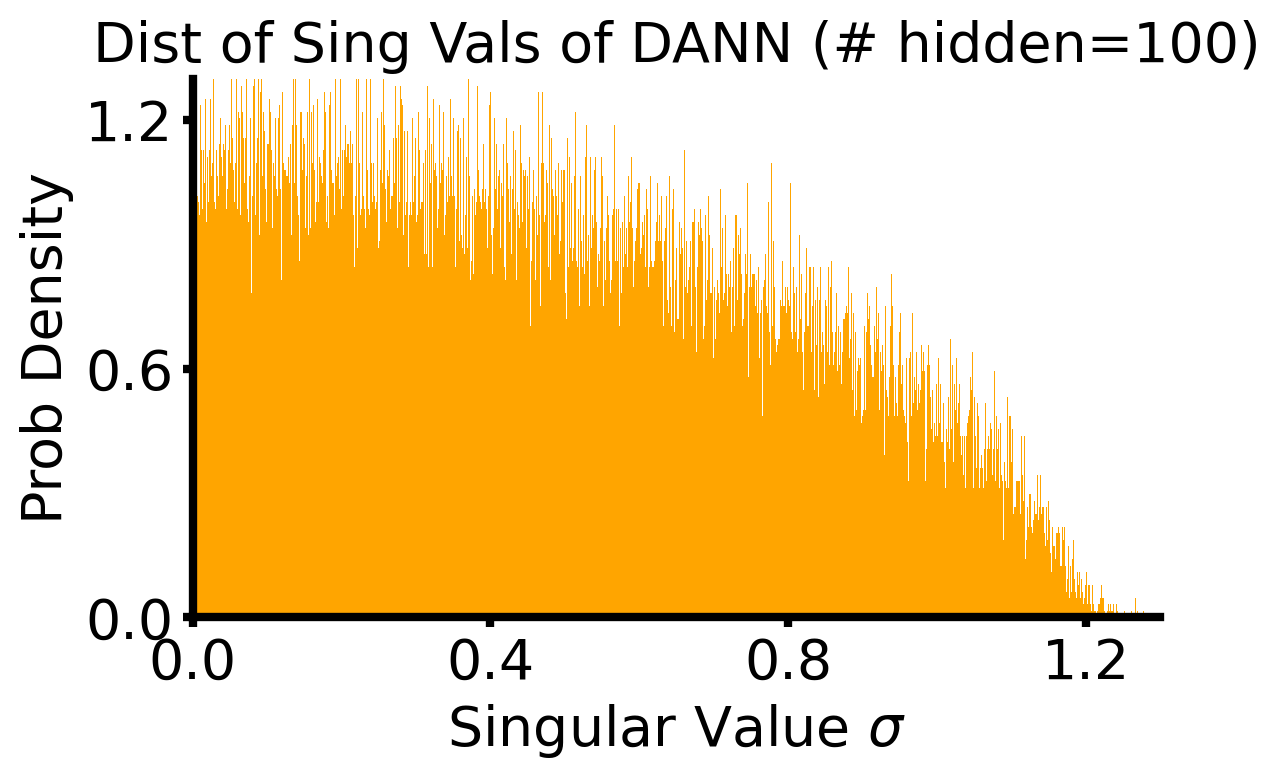

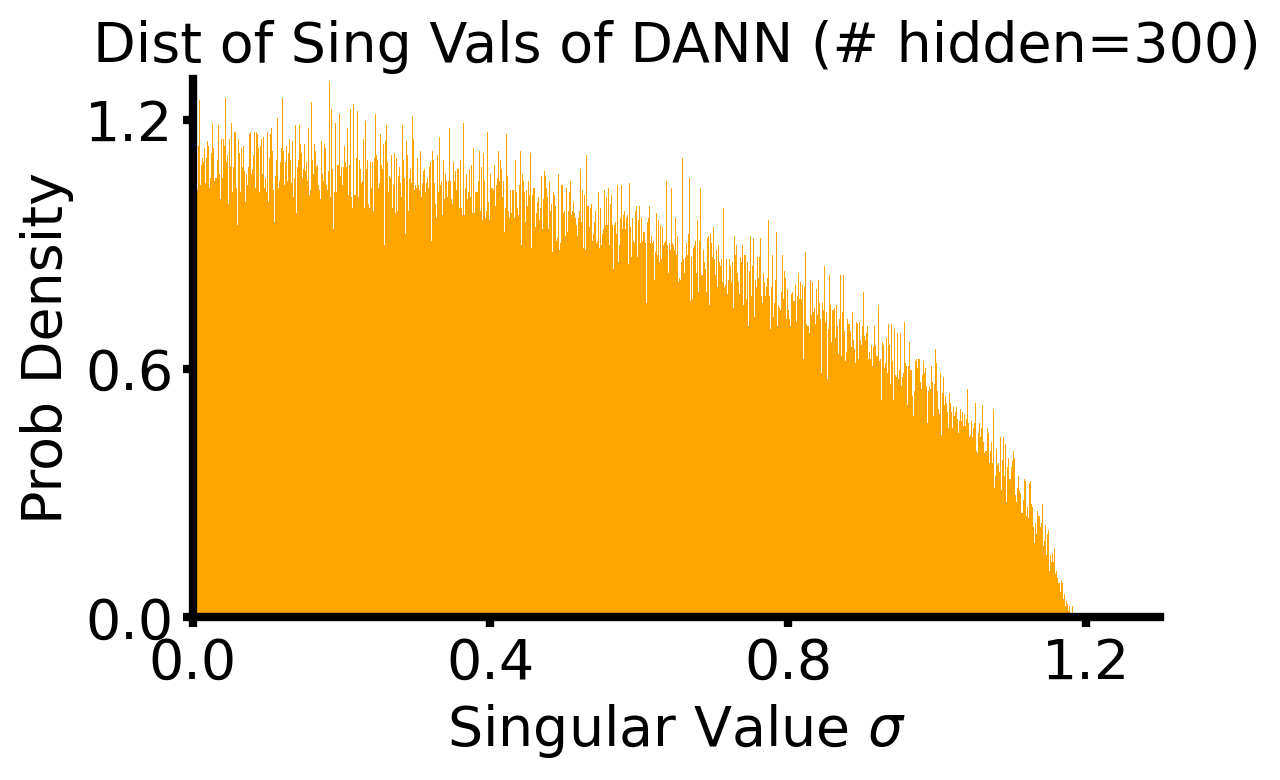

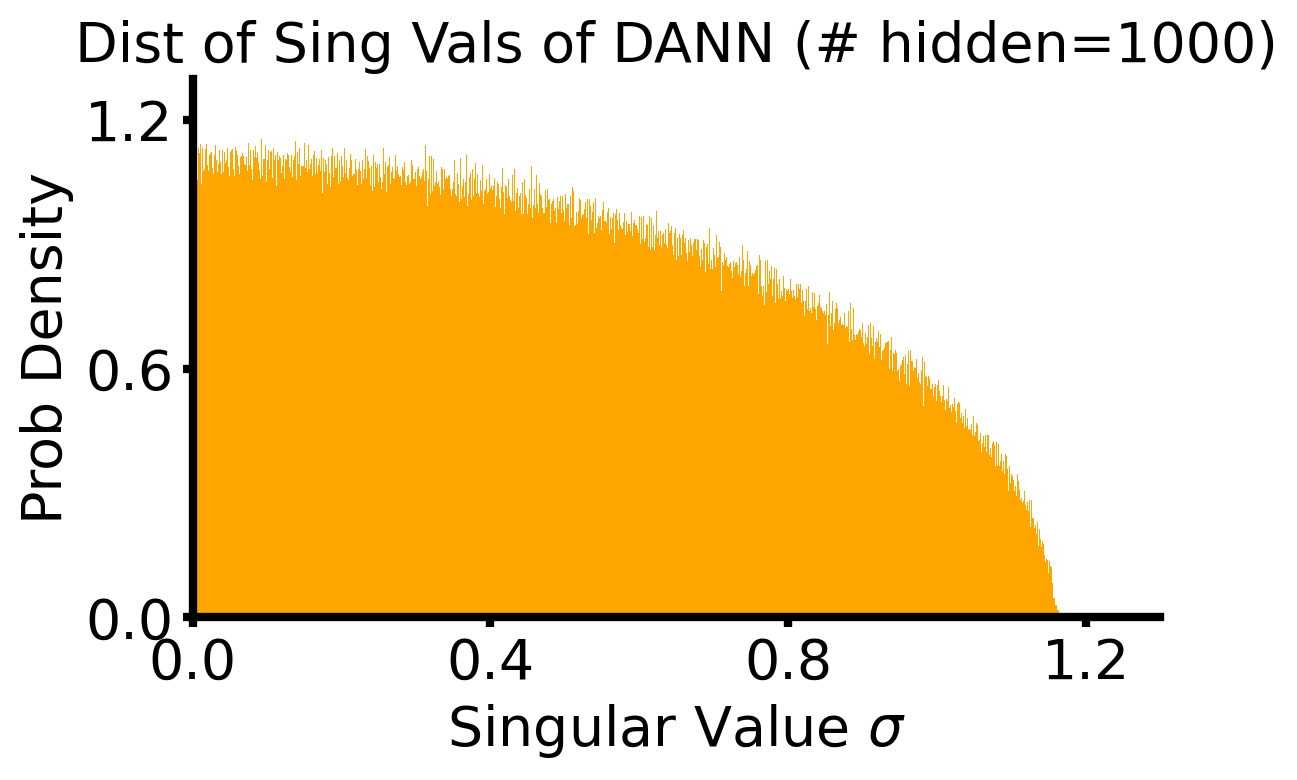

In [11]:
num=1/3  # 1/3 for pytorch
n_stimulations = 500

ne_s = [100, 300, 1000]

for ind, ne in enumerate(ne_s):
    ni=ne//10
    danns_sv_before = np.zeros(ne*n_stimulations)
    for i in range(n_stimulations):
        Wex = np.random.exponential(size=(ne, ne), scale=np.sqrt( (ne/((ne-1)) * ((num))/ne))) 
        Wix = (np.ones((ni, 1))) @ np.mean(Wex, axis=0, keepdims=True)
        Wei = np.random.exponential(size=(ne, ni), scale=np.sqrt( (ne/((ne-1)) * ((num))/ne)))
        Wei /= Wei.sum(axis=1, keepdims=True)
        danns_matrix = Wex - (Wei @ Wix)

        _, danns_sigma, _ = np.linalg.svd(danns_matrix)
        danns_sv_before[ne*i:ne*(i+1)] = danns_sigma
    ax = plt.subplot(111)
    matplotlib.rcParams['figure.dpi'] = 200
    matplotlib.rcParams["figure.figsize"] = (6,4)

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_linewidth(3)
    ax.spines.bottom.set_linewidth(3)
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)

    ax.hist(danns_sv_before, bins=1000, density=True, edgecolor='none', color='orange')
    plt.yticks(ticks=[0, 0.6, 1.2], size=20)
    plt.xticks(ticks=[0, 0.4, 0.8, 1.2], size=20)
    plt.xlabel(r"Singular Value $\sigma$", fontsize=20)
    plt.ylabel("Prob Density", fontsize=20)
    plt.ylim([0, 1.3])
    plt.xlim([0, 1.3])
    plt.title(f"Dist of Sing Vals of DANN (# hidden={ne})", fontsize=20)
    plt.tight_layout()
    plt.savefig(f'new_plots/SV_DANN_hidden{ne}.png', format='png', dpi=200)
    plt.savefig(f'new_plots/SV_DANN_hidden{ne}.svg', format='svg', dpi=200)
    plt.show()